#  TRAIN TEST SPLIT (80/ 20)  > Feature Extraction > SMOTE > Feature selection (RF, scoring = 'roc_auc') >  No Normalization > Custom Ensemble (acc: 94, f1: 73)

## Imports

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Data Preprocessing


In [ ]:
data = pd.io.stata.read_stata('SHILD2012_cens_eng_16-64.dta')
data.to_csv('my_stata_file.csv', index= False)

In [ ]:
df = pd.read_csv('my_stata_file.csv')

print(df)

        respnb gender  age int_result  method               A1         A2  \
0          1.0    Man   49  1. Answer  2. Web      Neither nor    Average   
1          2.0  Woman   39  1. Answer  2. Web          Content       Well   
2          3.0  Woman   64  1. Answer  1. Tel      Neither nor    Average   
3          4.0    Man   30  1. Answer  2. Web  Very discontent       Well   
4          5.0    Man   48  1. Answer  2. Web     Very content       Well   
...        ...    ...  ...        ...     ...              ...        ...   
18952  19871.0  Woman   16  1. Answer  2. Web          Content       Well   
18953  19872.0    Man   19  1. Answer  2. Web          Content  Very well   
18954  19873.0    Man   23  1. Answer  2. Web      Neither nor       Well   
18955  19874.0    Man   51  1. Answer  2. Web          Content    Average   
18956  19875.0    Man   64  1. Answer  2. Web          Content       Well   

                         B1                    B2                  B3  ... 

In [ ]:
df.head(10)

respnb gender  age int_result  method               A1       A2  \
0     1.0    Man   49  1. Answer  2. Web      Neither nor  Average   
1     2.0  Woman   39  1. Answer  2. Web          Content     Well   
2     3.0  Woman   64  1. Answer  1. Tel      Neither nor  Average   
3     4.0    Man   30  1. Answer  2. Web  Very discontent     Well   
4     5.0    Man   48  1. Answer  2. Web     Very content     Well   
5     8.0    Man   36  1. Answer  2. Web          Content     Well   
6     9.0  Woman   39  1. Answer  2. Web          Content  Average   
7    11.0  Woman   53  1. Answer  2. Web          Content     Well   
8    12.0  Woman   48  1. Answer  2. Web          Content     Well   
9    13.0    Man   52  1. Answer  2. Web          Content     Well   

                     B1                  B2                  B3  ...   S5  \
0  With some difficulty  Without difficulty  Without difficulty  ...  NaN   
1    Without difficulty  Without difficulty  Without difficulty  ...   No   
2    Without difficulty  Without difficulty  Without difficulty  ...  NaN   
3    Without difficulty  Without difficulty  Without difficulty  ...  NaN   
4    Without difficulty  Without difficulty  Without difficulty  ...   No   
5    Without difficulty  Without difficulty  Without difficulty  ...   No   
6    Without difficulty  Without difficulty  Without difficulty  ...   No   
7    Without difficulty  Without difficulty  Without difficulty  ...   No   
8  With much difficulty  Without difficulty  Without difficulty  ...   No   
9    Without difficulty  Without difficulty  Without difficulty  ...   No   

    S6   S7  S9                                               S11  \
0  NaN  NaN NaN                                               NaN   
1  NaN  NaN NaN     Long-cycle higher education (5 years or more)   
2  NaN  NaN NaN                                               NaN   
3  NaN  NaN NaN                                               NaN   
4  NaN  NaN NaN                  Further education (3 to 4 years)   
5  NaN  NaN NaN     Long-cycle higher education (5 years or more)   
6  NaN  NaN NaN                       The former secondary school   
7  NaN  NaN NaN                  Further education (3 to 4 years)   
8  NaN  NaN NaN  Short-term further education (less than 3 years)   
9  NaN  NaN NaN                  Further education (3 to 4 years)   

                                            S12A   S13    S28    S29  \
0                                            NaN   NaN    NaN    NaN   
1     Wage-earner with managerial responsibility  38.0  188.0   90.0   
2                                            NaN   NaN    NaN    NaN   
3                                            NaN   NaN    NaN    NaN   
4                     Under education, a student   NaN  172.0   83.0   
5  Wage-earner without managerial responsibility  37.0  177.0   59.0   
6              Self-employed or assisting spouse  90.0  181.0  100.0   
7       Top management (e.g. CEO/office manager)  45.0  184.0   98.0   
8  Wage-earner without managerial responsibility  42.0  192.0   96.0   
9  Wage-earner without managerial responsibility  37.0  164.0   70.0   

       pervgt  
0  134.898335  
1  145.903613  
2  113.084878  
3  290.302069  
4  133.543015  
5  192.089345  
6  175.360881  
7  127.506922  
8  121.450704  
9  146.165408  

[10 rows x 243 columns]

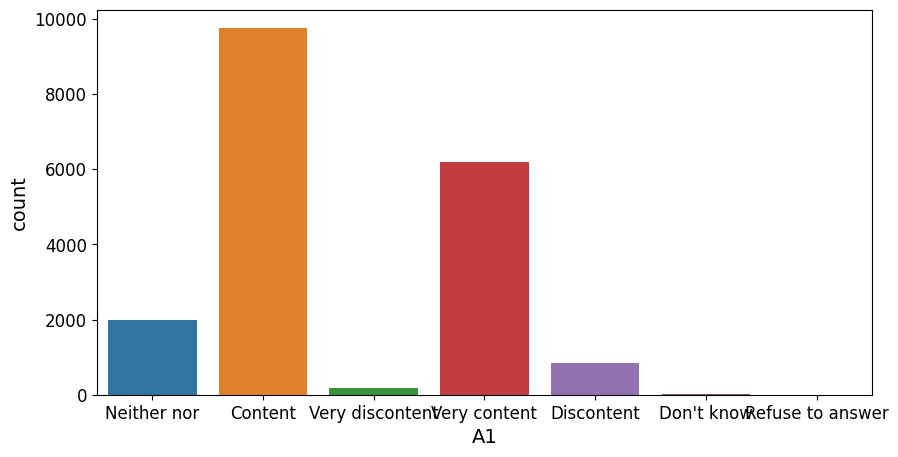

In [ ]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.countplot(x = df['A1'])
plt.show()



In [ ]:
A1 = []
counter = 0
for row in df['A1']:
    if row == 'Discontent':
        A1.append(1)
    elif row == 'Content':
        A1.append(0)
    elif row == 'Very content':
        A1.append(0)
    elif row == 'Very discontent':
        A1.append(1)
    else:
        A1.append(-1)

    ++counter
df['A1'] = A1

In [ ]:
# Removing all instances where A1 == 0. A1 = 0 are "don't know" answers in content vs discontent with life column
df = df[df.A1 > -1]

In [ ]:

# imports and initialization
import numpy as np
import os
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure imbalance-1.png


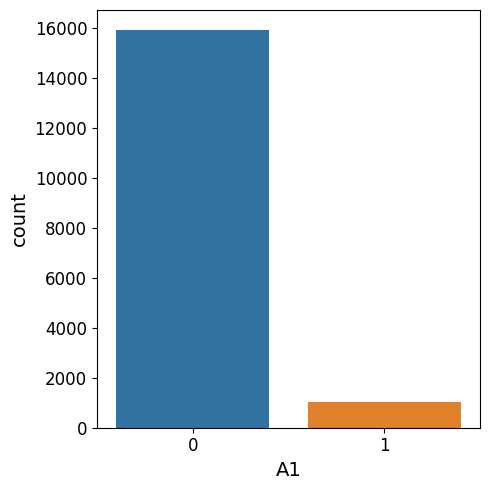

In [ ]:
# Distribution of content vs discontent

import seaborn as sns
plt.figure(figsize = (5, 5))
fig = sns.countplot(x = df['A1'])

save_fig("imbalance-1.png")
plt.show()



In [ ]:

print(df.shape)
df.head()

(16971, 243)


respnb gender  age int_result  method  A1       A2                  B1  \
1     2.0  Woman   39  1. Answer  2. Web   0     Well  Without difficulty   
3     4.0    Man   30  1. Answer  2. Web   1     Well  Without difficulty   
4     5.0    Man   48  1. Answer  2. Web   0     Well  Without difficulty   
5     8.0    Man   36  1. Answer  2. Web   0     Well  Without difficulty   
6     9.0  Woman   39  1. Answer  2. Web   0  Average  Without difficulty   

                   B2                  B3  ...   S5   S6   S7  S9  \
1  Without difficulty  Without difficulty  ...   No  NaN  NaN NaN   
3  Without difficulty  Without difficulty  ...  NaN  NaN  NaN NaN   
4  Without difficulty  Without difficulty  ...   No  NaN  NaN NaN   
5  Without difficulty  Without difficulty  ...   No  NaN  NaN NaN   
6  Without difficulty  Without difficulty  ...   No  NaN  NaN NaN   

                                             S11  \
1  Long-cycle higher education (5 years or more)   
3                                            NaN   
4               Further education (3 to 4 years)   
5  Long-cycle higher education (5 years or more)   
6                    The former secondary school   

                                            S12A   S13    S28    S29  \
1     Wage-earner with managerial responsibility  38.0  188.0   90.0   
3                                            NaN   NaN    NaN    NaN   
4                     Under education, a student   NaN  172.0   83.0   
5  Wage-earner without managerial responsibility  37.0  177.0   59.0   
6              Self-employed or assisting spouse  90.0  181.0  100.0   

       pervgt  
1  145.903613  
3  290.302069  
4  133.543015  
5  192.089345  
6  175.360881  

[5 rows x 243 columns]

In [ ]:
# Separate the independent (X) and dependent (y) features

y_df = df['A1']
df = df.drop(columns = ['A1', 'respnb', 'method', 'pervgt', 'G8', 'H1', 'H2', 'H3', 'K5', 'R10', 'R12_a'], axis=1)



In [ ]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
G5_5  16878  0.994520
G5_4  16878  0.994520
G5_6  16878  0.994520
N6    16847  0.992693
N7    16847  0.992693
B16   16756  0.987331
J5    16731  0.985858
F5    16721  0.985269
R8    16641  0.980555
F4    16615  0.979023
M5_a  16591  0.977609
B15   16578  0.976843
Q2    16543  0.974781
N15   16539  0.974545
N14   16539  0.974545
N18   16480  0.971068
G4    16461  0.969949
M5    16431  0.968181
G11   16382  0.965294
R13   16361  0.964056

Saving figure missing-1


<ipython-input-31-e85a1c7a057f>:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


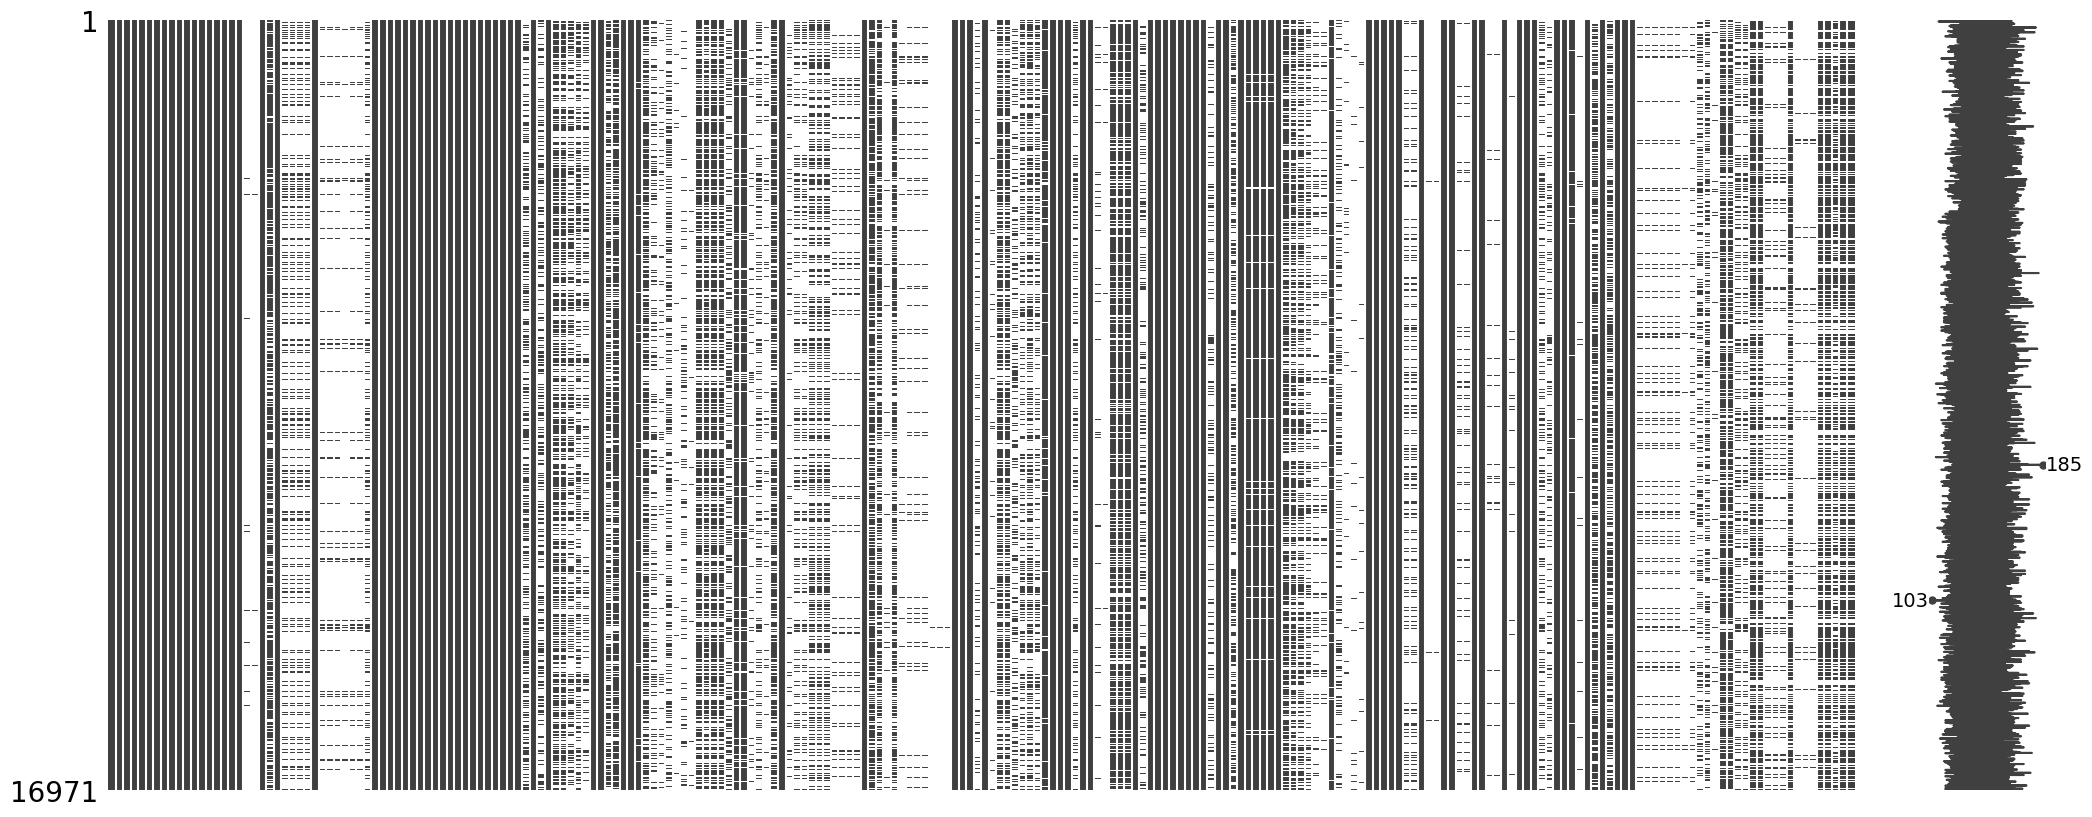

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)

save_fig("missing-1")
# Save the figure as an image file
plt.savefig("missing-1.png")

In [ ]:
#dropping columns with 18% or more null values
percentage = 18
min = int(((100-percentage)/100)*df.shape[0])

df.dropna(axis=1, thresh = min, inplace= True)

df.shape

(16971, 102)

In [ ]:
# remove duplicate entries, if any
df.drop_duplicates(inplace = True)

df.shape

(16971, 102)

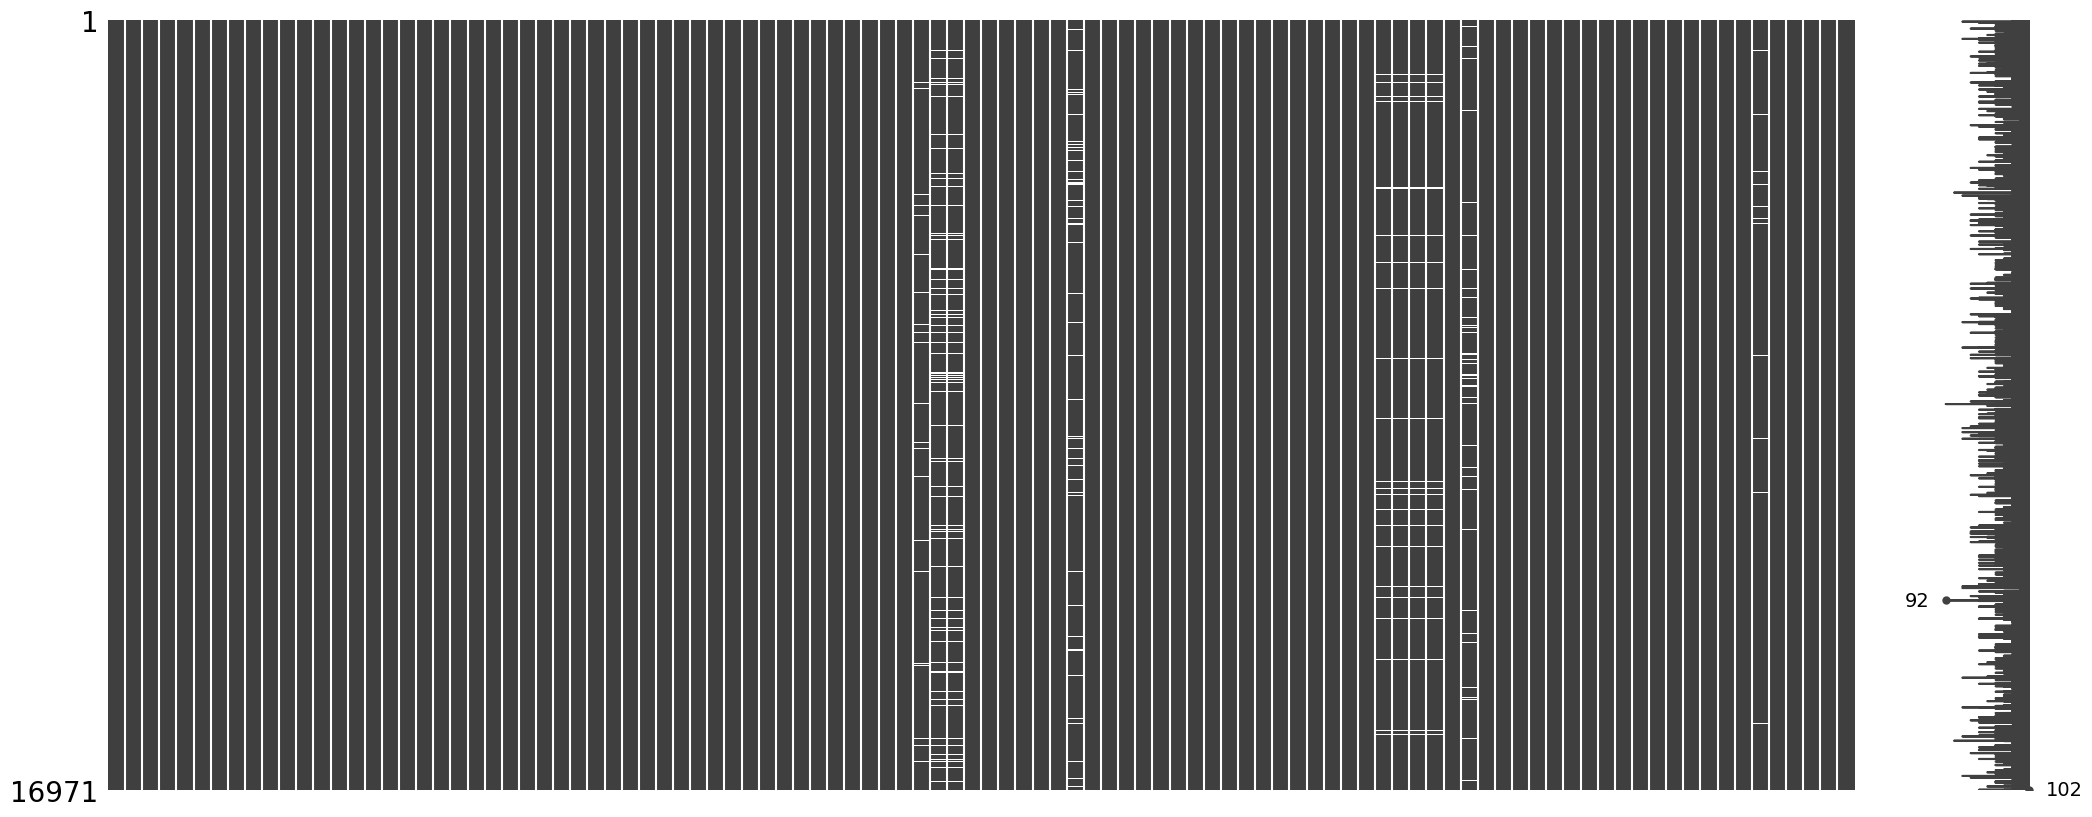

In [ ]:
import missingno as msno
msno.matrix(df)
# Save the figure as an image file
plt.savefig("missing-2.png")

In [ ]:
#print unique values of features

for cols in df.columns:
    unique_vals = df[cols].unique()
    if df[cols].dtype == object:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals , " ----> Datatype: ", df[cols].dtypes)

Feature  gender  has  2  unique values ---->  ['Woman' 'Man']  ----> Datatype:  object
Feature  int_result  has  1  unique values ---->  ['1. Answer']  ----> Datatype:  object
Feature  A2  has  5  unique values ---->  ['Well' 'Average' 'Very well' 'Poor' 'Very poor']  ----> Datatype:  object
Feature  B1  has  4  unique values ---->  ['Without difficulty' 'With much difficulty' 'With some difficulty'
 'Not at all']  ----> Datatype:  object
Feature  B2  has  4  unique values ---->  ['Without difficulty' 'With some difficulty' 'With much difficulty'
 'Not at all']  ----> Datatype:  object
Feature  B3  has  4  unique values ---->  ['Without difficulty' 'With some difficulty' 'With much difficulty'
 'Not at all']  ----> Datatype:  object
Feature  B4  has  4  unique values ---->  ['Without difficulty' 'With some difficulty' 'With much difficulty'
 'Not at all']  ----> Datatype:  object
Feature  B5  has  4  unique values ---->  ['Without difficulty' 'With some difficulty' 'With much difficult

In [ ]:
# Convert Catergorical values to numeric representation

df['gender'].replace({'Woman':0, 'Man':1}, inplace = True)

df['int_result'].replace({'1. Answer':0}, inplace = True)

df['A2'].replace({'Average':1, 'Well':2, 'Very well':3, 'Poor':1, 'Very poor':0, "Don't know":-1}, inplace = True)

#B1-B13 'Without difficulty':2, 'With some difficulty':0, 'With much difficulty':2,'Not at all':3, "Don't know":4, 'Refuse to answer':5
#--

df['B1'].replace({'With some difficulty':1, 'Without difficulty':2, 'With much difficulty':0,'Not at all':3}, inplace = True)

df['B2'].replace({'With some difficulty':1, 'Without difficulty':2, 'With much difficulty':0,'Not at all':3}, inplace = True)

df['B3'].replace({'With some difficulty':1, 'Without difficulty':2, 'With much difficulty':0,'Not at all':3}, inplace = True)

df['B4'].replace({'With some difficulty':1, 'Without difficulty':2, 'With much difficulty':0,'Not at all':3}, inplace = True)

df['B5'].replace({'With some difficulty':1, 'Without difficulty':2, 'With much difficulty':0,'Not at all':3}, inplace = True)

df['B6'].replace({'With some difficulty':1, 'Without difficulty':2, 'With much difficulty':0,'Not at all':3}, inplace = True)

df['B7'].replace({'With some difficulty':1, 'Without difficulty':2, 'With much difficulty':0,'Not at all':3}, inplace = True)

df['B8'].replace({'With some difficulty':1, 'Without difficulty':2, 'With much difficulty':0,'Not at all':3, "Don't know":-1}, inplace = True)

df['B9'].replace({'With some difficulty':1, 'Without difficulty':2, 'With much difficulty':0,'Not at all':3, "Don't know":-1}, inplace = True)

df['B10'].replace({'With some difficulty':1, 'Without difficulty':2, 'With much difficulty':0,'Not at all':3, "Don't know":-1, 'Refuse to answer':-1.5}, inplace = True)

df['B11'].replace({'With some difficulty':1, 'Without difficulty':2, 'With much difficulty':0,'Not at all':3, "Don't know":-1}, inplace = True)

df['B12'].replace({'With some difficulty':1, 'Without difficulty':2, 'With much difficulty':0,'Not at all':3, "Don't know":-1}, inplace = True)

df['B13'].replace({'With some difficulty':1, 'Without difficulty':2, 'With much difficulty':0,'Not at all':3}, inplace = True)
#--

df['B14'].replace({'No':0, 'Yes':1}, inplace = True)

df['B17_a'].replace({'Yes':1, 'No':0}, inplace = True)

df['C1'].replace({'No':0, 'Yes':1, "Don't know":-1}, inplace = True)

df['C4'].replace({'No':2, 'Yes, one':1, "Don't know":-1, 'Yes, more':0}, inplace = True)


#D1-E3 often, always, sometimes, rarely, never, don't know 0<1<5
#--
df['D1'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4}, inplace = True)

df['D2'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4, 'Refuse to answer':-1.5}, inplace = True)

df['D3'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4}, inplace = True)

df['D4'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4}, inplace = True)

df['D5'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4}, inplace = True)

df['D6'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4}, inplace = True)

df['D7'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4, 'Refuse to answer':-1.5}, inplace = True)

df['D8'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4}, inplace = True)

df['D9'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4, 'Refuse to answer':-1.5}, inplace = True)

df['D10'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4, 'Refuse to answer':-1.5}, inplace = True)

df['D11'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4, 'Refuse to answer':-1.5}, inplace = True)

df['D12'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4, 'Refuse to answer':-1.5}, inplace = True)

df['D13'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4, 'Refuse to answer':-1.5}, inplace = True)

df['D14'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4, 'Refuse to answer':-1.5}, inplace = True)

df['D15'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4, 'Refuse to answer':-1.5}, inplace = True)

df['D16'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4, 'Refuse to answer':-1.5}, inplace = True)

df['D17'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4, 'Refuse to answer':-1.5}, inplace = True)

df['E3'].replace({'Often':3, 'Rarely':1, 'Never':0, 'Sometimes':2, "Don't know":-1, 'Always':4}, inplace = True)
# --

df['E5_a'].replace({'No':0, 'Yes':1, "Don't know":-1}, inplace = True)

df['E6'].replace({'Yes':1, 'No':0, 'Refuse to answer':-1}, inplace = True)

df['E12'].replace({'Once a week':6, '2-3 times a week':7,
 'Less than once a month, but several times a year':4, 'Never':0,
 'Almost every day':8, 'Less frequently':1, 'Once a month':3, 'Every day':9,
 'Once every fortnight':5, "Don't know":-1}, inplace = True)

df['E17'].replace({'Friends/colleagues':0, 'Partner/spouse/boy-/girlfriend':1,
 'I don\x92t share this with anyone':2, 'Siblings':3, 'Parents':4, 'Others':5,
 "Don't know":-1, 'Children':7, 'Staff':8, 'Other family':9, 'Refuse to answer':-1}, inplace = True)

df['education'].replace({'Completed secondary school or more (eksamensskole)':0,
 'Completed compulsory school (folkeskole, 9 years)':1}, inplace = True)

df['job'].replace({'Holds an ordinary or supported job':0,
 "Doesn't hold an ordinary or supported job":1}, inplace = True)


df['F10'].replace({'No':0, 'Yes':1, "Don't know":-1}, inplace = True)

df['F11'].replace({'No':0, 'Yes':1, "Don't know":-1}, inplace = True)

df['F15'].replace({'9':9, '8':8, '6':6, '7':7 , '2':2, '5':5, '1':1, '4':4, '0':0, '3':3, "Don't know":-1, '0 very low':0, 'Refuse to answer':-1.5}, inplace = True)


df['G1'].replace({'No':0, 'Yes':1, 'Refuse to answer':-1}, inplace = True)

df['G6'].replace({'Yes, my mom is alive':1, 'Yes, my dad is alive':2, 'No':0, 'Yes, both are alive':4,
 "Don't Know":-1}, inplace = True)

df['G7'].replace({'No, none of my parents':0, 'Yes, one parent':1, 'Yes, both parents':2,
 "Don't Know":-1}, inplace = True)


df['G10_a'].replace({'No':0, 'Yes':1, "Don't know":-1}, inplace = True)

df['G11_a'].replace({'Yes':1, 'No':0, "Don't know":-1}, inplace = True)

#J1- J20
df['J1'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2, "Don't Know":-1}, inplace = True)

df['J2'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2, 'Refuse to answer':-1, '99':-1}, inplace = True)

df['J3'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2, 'Refuse to answer':-1, '99':-1}, inplace = True)

df['J4'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2, 'Refuse to answer':-1, '99':-1}, inplace = True)



df['J18'].replace({ 'No':0, 'Yes':1, "Don't know":-1}, inplace = True)

df['J18a'].replace({'No':0, 'Yes':1, "Don't know":-1}, inplace = True)
df['J8a'].replace({'Yes':1, 'No':0, "Don't know":-1}, inplace = True)

df['J9'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2}, inplace = True)

df['J10'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2,"Don't Know":-1}, inplace = True)

df['J11'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2,"Don't Know":-1}, inplace = True)

df['J12'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2,"Don't Know":-1}, inplace = True)

df['J13'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2,"Don't Know":-1}, inplace = True)

df['J14'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2,"Don't Know":-1}, inplace = True)

df['J15'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2,"Don't Know":-1}, inplace = True)

df['J16_a'].replace({'No':0, 'Yes':1, "Don't know":-1}, inplace = True)

df['J20'].replace({'Yes':1, 'No':0, "Don't know":-1}, inplace = True)

df['K1_a'].replace({'Yes':1, 'No':0}, inplace = True)

#K1-K5

df['K1'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2}, inplace = True)

df['K2'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2}, inplace = True)

df['K3'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2}, inplace = True)

df['K4'].replace({'Less frequently':1, 'Daily':6, 'Several times a month':4, 'Several times a week':5,
 'Once a week':3, 'Never':0, 'Once a month':2}, inplace = True)

df['L8_1'].replace({'Withdraw the money immediately DKK 100,000 (EUR 13,407)':0,
 'Withdraw the money in 12 months DKK 102,000 (EUR 13,675)':1, "Don't know":2,
 'Refuse to answer':3}, inplace = True)

df['M2'].replace({'Salary, fee income':0, 'Early retirement/retirement pension':1,
 'Social security':2, 'Other':3, 'Pension schemes':4, 'Self-employment income':5,
 'Unemployment benefits':6, 'Incapacity benefit':7, 'Other welfare':8,
 "Don't Know":9, 'Trading bonds, shares and real estate':10, 'Interest income':11,
 'Inheritance':12, 'Black money':13}, inplace = True)

df['M8'].replace({'Good':3, 'Average':2, 'Bad':1, 'Very good':4, 'Very bad':0, "Don't Know":-1,
 'Refuse to answer':-1.5}, inplace = True)

df['N1'].replace({'No':0,'Yes':1, "Don't know":-1, 'Refuse to answer':-1.5}, inplace = True)

df['N2'].replace({'Yes':1, 'No':0, "Don't know":-1}, inplace = True)

df['N5'].replace({'Yes':1, 'No':0, "Don't know":-1}, inplace = True)

df['N8'].replace({'Yes':1, 'No':0, "Don't know":-1}, inplace = True)

df['N9'].replace({'Yes':1, 'No':0, "Don't know":-1}, inplace = True)

df['N12'].replace({'No':0,'Yes':1, "Don't know":-1, 'Refuse to answer':-1.5}, inplace = True)

df['N13'].replace({'No':0,'Yes':1, "Don't know":-1, 'Refuse to answer':-1.5}, inplace = True)

df['N16'].replace({'Yes':1, 'No':0, "Don't know":-1}, inplace = True)

df['Q1'].replace({'No':0,'Yes':1, "Don't know":-1, 'Refuse to answer':-1.5}, inplace = True)

df['Q1_a'].replace({'No':0,'Yes':1, "Don't know":-1, 'Refuse to answer':-1.5}, inplace = True)

df['Q1_b'].replace({'No':0,'Yes':1, "Don't know":-1, 'Refuse to answer':-1.5}, inplace = True)

df['Q1_e'].replace({'No':0,'Yes':1, "Don't know":-1, 'Refuse to answer':-1.5}, inplace = True)

df['Q1_f'].replace({'No':0,'Yes':1, "Don't know":-1, 'Refuse to answer':-1.5}, inplace = True)

df['Q1_g'].replace({'No':0,'Yes':1, "Don't know":-1, 'Refuse to answer':-1.5}, inplace = True)

df['Q3_a'].replace({'No':0,'Yes':1, "Don't know":-1, 'Refuse to answer':-1.5}, inplace = True)

df['Q4_a'].replace({'Yes':1, 'No':0, "Don't know":-1, 'Refuse to answer':-1.5}, inplace = True)

df['Q5'].replace({'I would consider it for a while, but probably say yes':0,
 'I would say yes, without hesitation':1, 'I would be very much in doubt':2,
 'I would say no, without hesitation':3, "Don't Know":4,
 'I would consider it for a while, but probably say no':5, 'Refuse to answer':6}, inplace = True)

df['Q6'].replace({'I would consider it for a while, but probably say yes':0,
 'I would say yes, without hesitation':1,
 'I would say no, without hesitation':2, 'I would be very much in doubt':3,
 'I would consider it for a while, but probably say no':4, "Don't Know":5,
 'Refuse to answer':6}, inplace = True)

df['R1'].replace({'None':0, '6-10 times':1, '1-2 times':2, 'More than 10 times':3, "Don't Know":4,
 '3-5 times':5, 'Refuse to answer':6}, inplace = True)

#df['R10'].replace({'Yes':1, 'No':0, "Don't know":-1, 'Refuse to answer':-1.5}, inplace = True)

#df['R12_a'].replace({'Yes':1, 'No':0, "Don't know":-1, 'Refuse to answer':-1.5}, inplace = True)




In [ ]:
y_df.describe()

count    16971.000000
mean         0.060574
std          0.238554
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: A1, dtype: float64

## TRAIN TEST SPLIT

In [ ]:
X = df
Y = y_df

In [ ]:
# Splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y_df, test_size = 0.2, random_state = 20)
X_train.head(5)

gender  age  int_result  A2  B1  B2  B3  B4  B5  B6  ...  Q1_a  Q1_b  \
990         1   52           0   2   2   2   2   2   2   2  ...   0.0   0.0   
5174        0   51           0   3   3   2   2   2   2   2  ...   0.0   0.0   
12320       0   58           0   2   1   2   2   2   2   2  ...   0.0   0.0   
6820        0   64           0   3   2   2   2   2   2   2  ...   0.0   0.0   
10906       1   46           0   2   2   0   2   2   1   2  ...   0.0   0.0   

       Q1_e  Q1_f  Q1_g  Q3_a  Q4_a  Q5  Q6  R1  
990     0.0   0.0   0.0   0.0   0.0   5   4   0  
5174    0.0   0.0   0.0   0.0   0.0   0   0   0  
12320   0.0   0.0   0.0   0.0   0.0   0   3   0  
6820    0.0   0.0   0.0   1.0   1.0   1   1   0  
10906   0.0   0.0   0.0   0.0   1.0   0   0   0  

[5 rows x 102 columns]

## FEATURE EXTRACTION

### ZERO VARIANCE

In [ ]:
# ZERO VARIANCE

from sklearn.feature_selection import VarianceThreshold

zeroVar = VarianceThreshold(threshold=0)               #variance=0
zeroVar.fit_transform(df)
#zeroVar.fit_transform(X_test)

zeroVar.get_support()        # columns having non-zero variance = True
sum(zeroVar.get_support())   # number of columns having non-zero variance

101

In [ ]:
	#Dropping constant columns

constant_columns = [column for column in df.columns
                  if column not in df.columns[zeroVar.get_support()]]

	print(len(constant_columns))


X_train.drop(constant_columns,axis=1, inplace=True)
X_test.drop(constant_columns,axis=1, inplace=True)
X.drop(constant_columns,axis=1, inplace=True)

1


In [ ]:

X_train.shape

(13576, 101)

### Correlation

In [ ]:
# Pearson's Correlation Coefficient
import seaborn as sns
import numpy as np

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (106,106))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.8) # 80% is a good value of the threshold
print(len(corr_features))
print(corr_features)

0
set()


In [ ]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X.drop(corr_features,axis=1, inplace=True)
X_train.shape

(13576, 101)

### Outliers

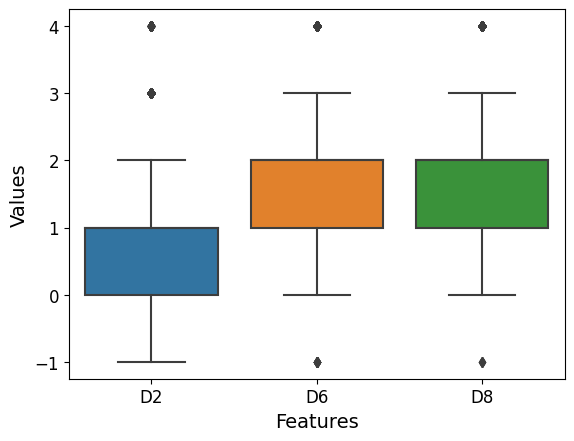

In [ ]:
import seaborn as sns
ax = sns.boxplot(data = X_train[['D2', 'D6', 'D8']])

ax.set(xlabel='Features', ylabel='Values')
# Save the figure as an image file
plt.savefig("outliers.png")


In [ ]:
#replacing outliers that lie more than 2 standard deviations away from the mean


for col in X_train.columns:
  mean = X_train[col].mean()
  sd = X_train[col].std()
  median = X_train[col].median()
  X_train[col].mask(X_train[col] > mean+(2*sd), median, inplace=True)
  X_train[col].mask(X_train[col] < mean-(2*sd), median, inplace=True)

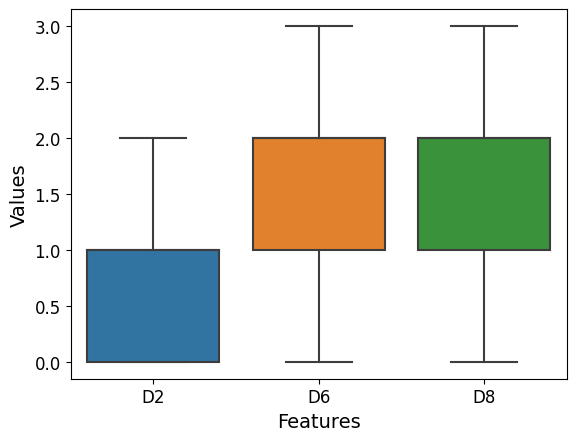

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.boxplot(data=X_train[['D2', 'D6', 'D8']])
ax.set(xlabel='Features', ylabel='Values')

# Save the figure as an image file
plt.savefig("outliers-2.png")



In [ ]:
# Imputing null values

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_cols = X_train.columns


imp = IterativeImputer(max_iter=10, random_state=21)
imp.fit(X_train)
X_train = imp.transform(X_train)
X_train = pd.DataFrame(X_train, columns = df_cols)

X_test = imp.transform(X_test)
X_test = pd.DataFrame(X_test, columns = df_cols)

X = imp.transform(X)
X = pd.DataFrame(X, columns = df_cols)

<Axes: >

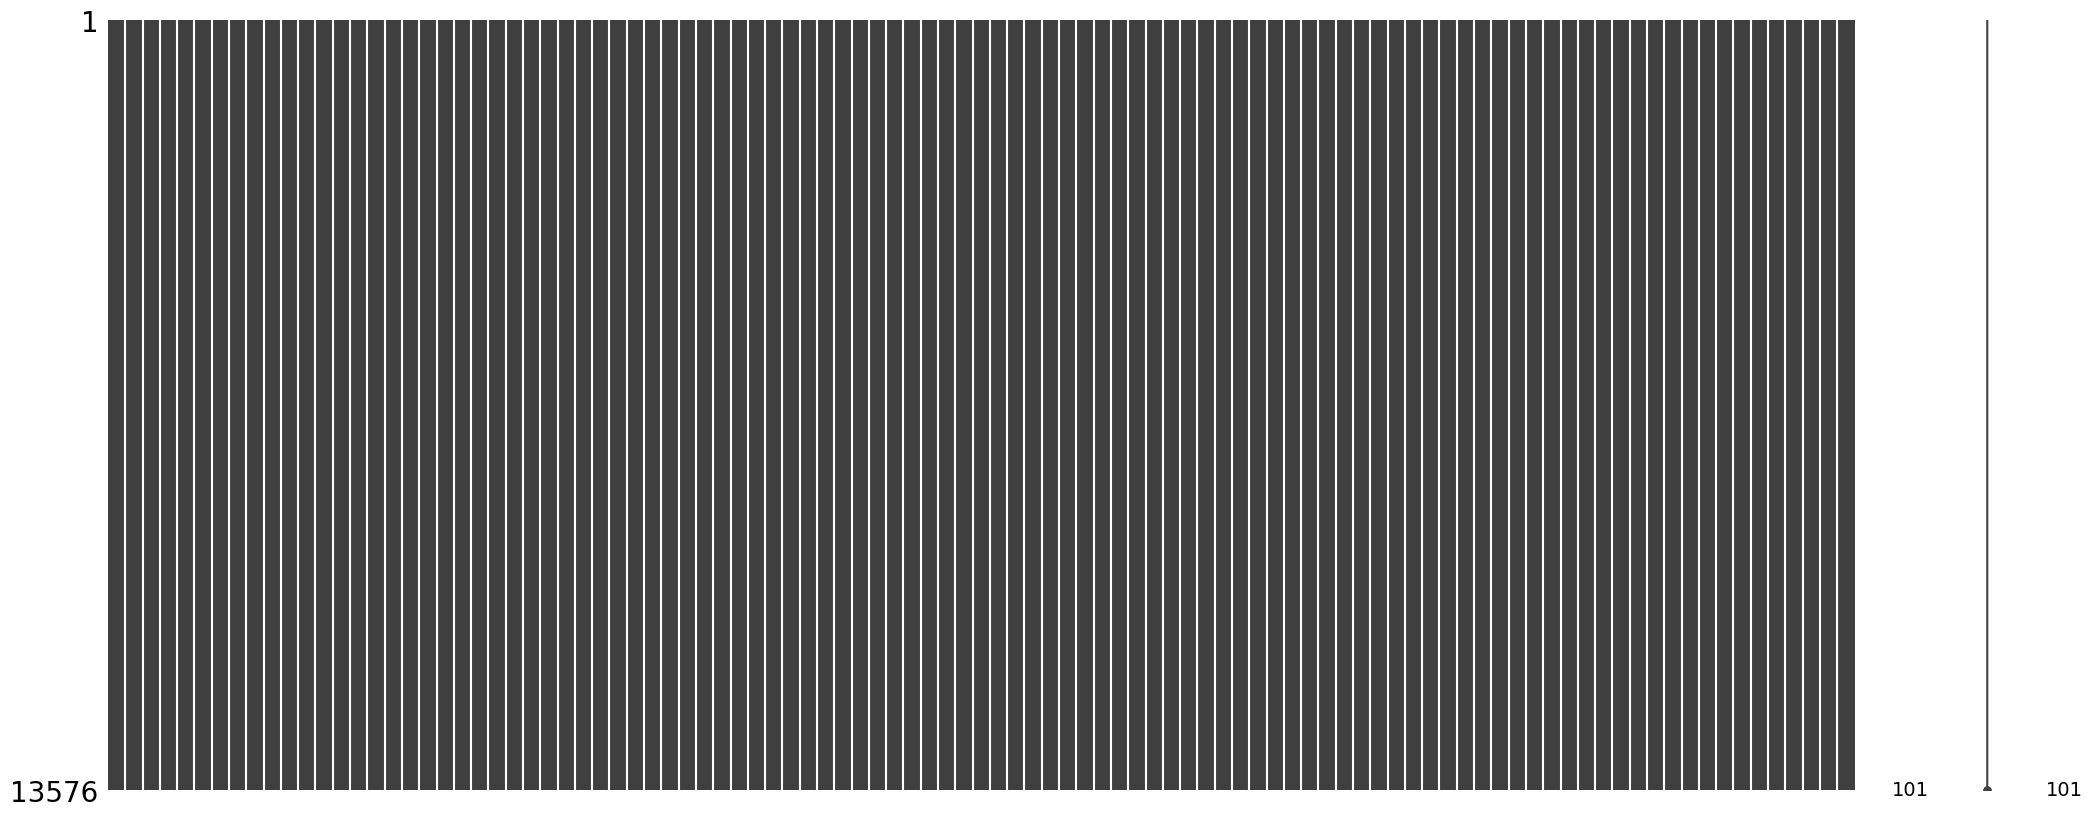

In [ ]:
import missingno as msno
msno.matrix(X_train)


In [ ]:
pd.set_option('display.max_columns', None)
X_train.describe()

gender           age            A2            B1       B2  \
count  13576.000000  13576.000000  13576.000000  13576.000000  13576.0   
mean       0.470094     43.069976      1.962802      1.743297      2.0   
std        0.499123     14.115570      0.659829      0.436830      0.0   
min        0.000000     16.000000      1.000000      1.000000      2.0   
25%        0.000000     32.000000      2.000000      1.000000      2.0   
50%        0.000000     45.000000      2.000000      2.000000      2.0   
75%        1.000000     55.000000      2.000000      2.000000      2.0   
max        1.000000     64.000000      3.000000      2.000000      2.0   

            B3       B4       B5       B6       B7       B8       B9      B10  \
count  13576.0  13576.0  13576.0  13576.0  13576.0  13576.0  13576.0  13576.0   
mean       2.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        2.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
25%        2.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
50%        2.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
75%        2.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
max        2.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   

           B11      B12      B13      B14         B17_a            C1  \
count  13576.0  13576.0  13576.0  13576.0  13576.000000  13576.000000   
mean       2.0      2.0      2.0      0.0      0.760091      0.232101   
std        0.0      0.0      0.0      0.0      0.427043      0.422189   
min        2.0      2.0      2.0      0.0      0.000000      0.000000   
25%        2.0      2.0      2.0      0.0      1.000000      0.000000   
50%        2.0      2.0      2.0      0.0      1.000000      0.000000   
75%        2.0      2.0      2.0      0.0      1.000000      0.000000   
max        2.0      2.0      2.0      0.0      1.000000      1.000000   

            C4            D1            D2            D3            D4  \
count  13576.0  13576.000000  13576.000000  13576.000000  13576.000000   
mean       2.0      3.455952      0.785209      1.174720      3.050088   
std        0.0      0.498074      0.680140      0.816838      0.670666   
min        2.0      3.000000      0.000000      0.000000      2.000000   
25%        2.0      3.000000      0.000000      1.000000      3.000000   
50%        2.0      3.000000      1.000000      1.000000      3.000000   
75%        2.0      4.000000      1.000000      2.000000      4.000000   
max        2.0      4.000000      2.000000      3.000000      4.000000   

                 D5            D6            D7            D8            D9  \
count  13576.000000  13576.000000  13576.000000  13576.000000  13576.000000   
mean       3.790513      1.595978      0.950501      1.615645      1.161682   
std        0.406958      0.766179      0.685592      0.851840      0.843744   
min        3.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.000000      1.000000      0.000000      1.000000      1.000000   
50%        4.000000      2.000000      1.000000      2.000000      1.000000   
75%        4.000000      2.000000      1.000000      2.000000      2.000000   
max        4.000000      3.000000      2.000000      3.000000      3.000000   

                D10           D11           D12           D13           D14  \
count  13576.000000  13576.000000  13576.000000  13576.000000  13576.000000   
mean       2.861078      3.100250      1.079847      3.221788      3.114025   
std        0.923361      0.910773      0.652715      0.612888      0.625516   
min        1.000000      1.000000      0.000000      2.000000      2.000000   
25%        2.000000      3.000000      1.000000      3.000000      3.000000   
50%        3.000000      3.000000      1.000000      3.000000      3.000000   
75%        4.000000      4

### BALANCING

In [ ]:
# Fixing imbalance with over & undersampling

import imblearn
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

oversample = SMOTETomek(sampling_strategy=.4, random_state=21, n_jobs=-1)
Xb, y_b = oversample.fit_resample(X_train, y_train)


# Checking if data has been balanced

from collections import Counter
#print(Counter(y))
print(Counter(y_b))

Counter({0: 12586, 1: 4935})


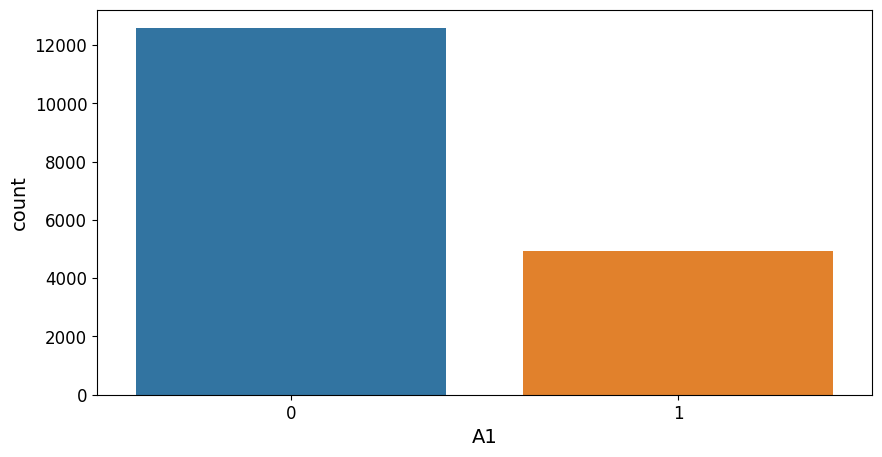

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.countplot(x = y_b)
plt.show()

y_b.value_counts()

# Save the figure as an image file
plt.savefig("balance-2.png")

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=1)


#Xdf=np.array(df)
#Xb = X_train
#y_b = y_train
y = y_train
Xb, y_b = undersample.fit_resample(Xb, y_b)

from collections import Counter
print(Counter(y))
print(Counter(y_b))

Counter({0: 12751, 1: 825})
Counter({0: 4935, 1: 4935})


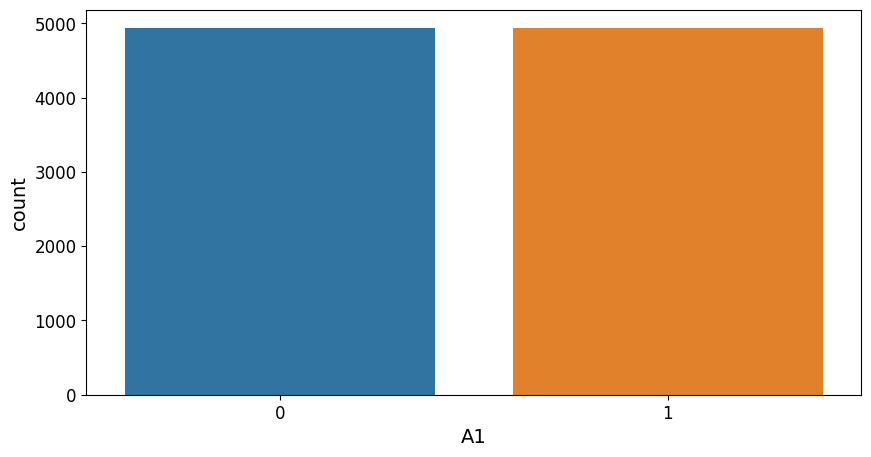

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.countplot(x = y_b)
plt.show()
# Save the figure as an image file
plt.savefig("balance-3.png")
#y_b.value_counts()


In [ ]:
columns = X_train.columns
Xb = pd.DataFrame(Xb, columns = columns)
X_train = Xb
y_train = y_b

## Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

rfc = RandomForestClassifier(random_state=21, n_jobs=-1)
#rfc = GradientBoostingClassifier()
#rfc = DecisionTreeClassifier()

rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='roc_auc', n_jobs=-1)
#rfecv.fit(Xb, y_b)
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(n_jobs=-1, random_state=21), n_jobs=-1,
      scoring='roc_auc')

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 88


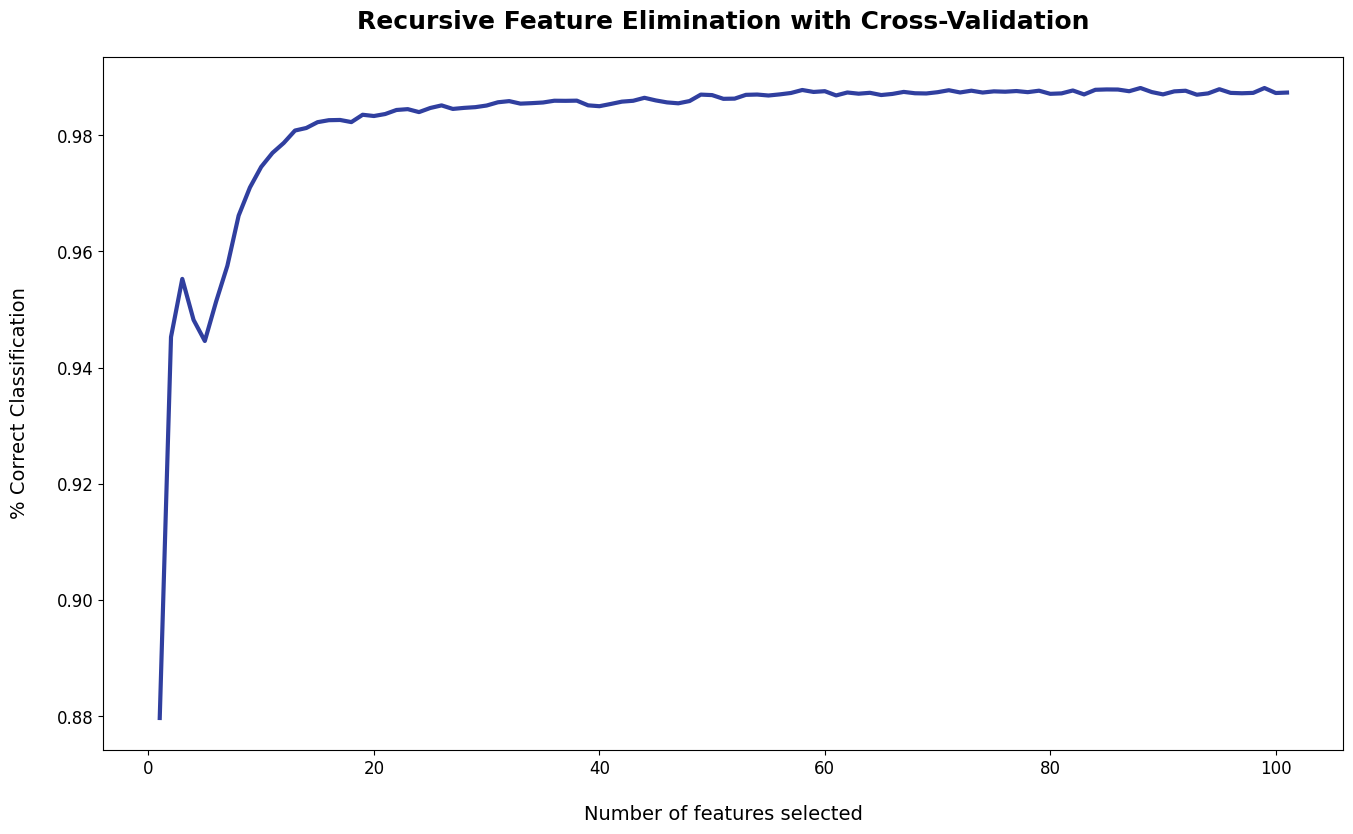

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], color='#303F9F', linewidth=3)

#plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

# Save the figure as an image file
plt.savefig("RFECV.png")

In [ ]:
print(np.where(rfecv.support_ == False)[0])

[13 14 15 16 19 86 87 88 89 90 91 92 93]


In [ ]:
print(np.where(rfecv.estimator_.feature_importances_ == 0)[0])

[ 4  5  6  7  8  9 10 11 12 40 42 48 49 54 55 67 77 78 79 80 81 82]


In [ ]:
selected_features = X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1)

In [ ]:
rfecv.estimator_.feature_importances_

array([0.00295692, 0.01473202, 0.14653569, 0.00509347, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00489497, 0.04709355,
       0.00560872, 0.07508082, 0.00659807, 0.01095491, 0.00455788,
       0.05741855, 0.00658148, 0.05425395, 0.00706199, 0.02902295,
       0.01635082, 0.00905239, 0.00902088, 0.00839412, 0.01262689,
       0.01763833, 0.02502403, 0.00986141, 0.0108305 , 0.00859074,
       0.02146861, 0.00607977, 0.00833509, 0.00886056, 0.01401973,
       0.        , 0.0288968 , 0.        , 0.008124  , 0.02312939,
       0.02808326, 0.00717809, 0.0065688 , 0.        , 0.        ,
       0.0072349 , 0.00957805, 0.00886644, 0.01070341, 0.        ,
       0.        , 0.00509674, 0.00960215, 0.00842815, 0.00463321,
       0.0026806 , 0.00520562, 0.01328904, 0.00749221, 0.00324099,
       0.01620492, 0.00548752, 0.        , 0.00698745, 0.00737814,
       0.00553759, 0.0062083 , 0.00785531, 0.01006087, 0.01056

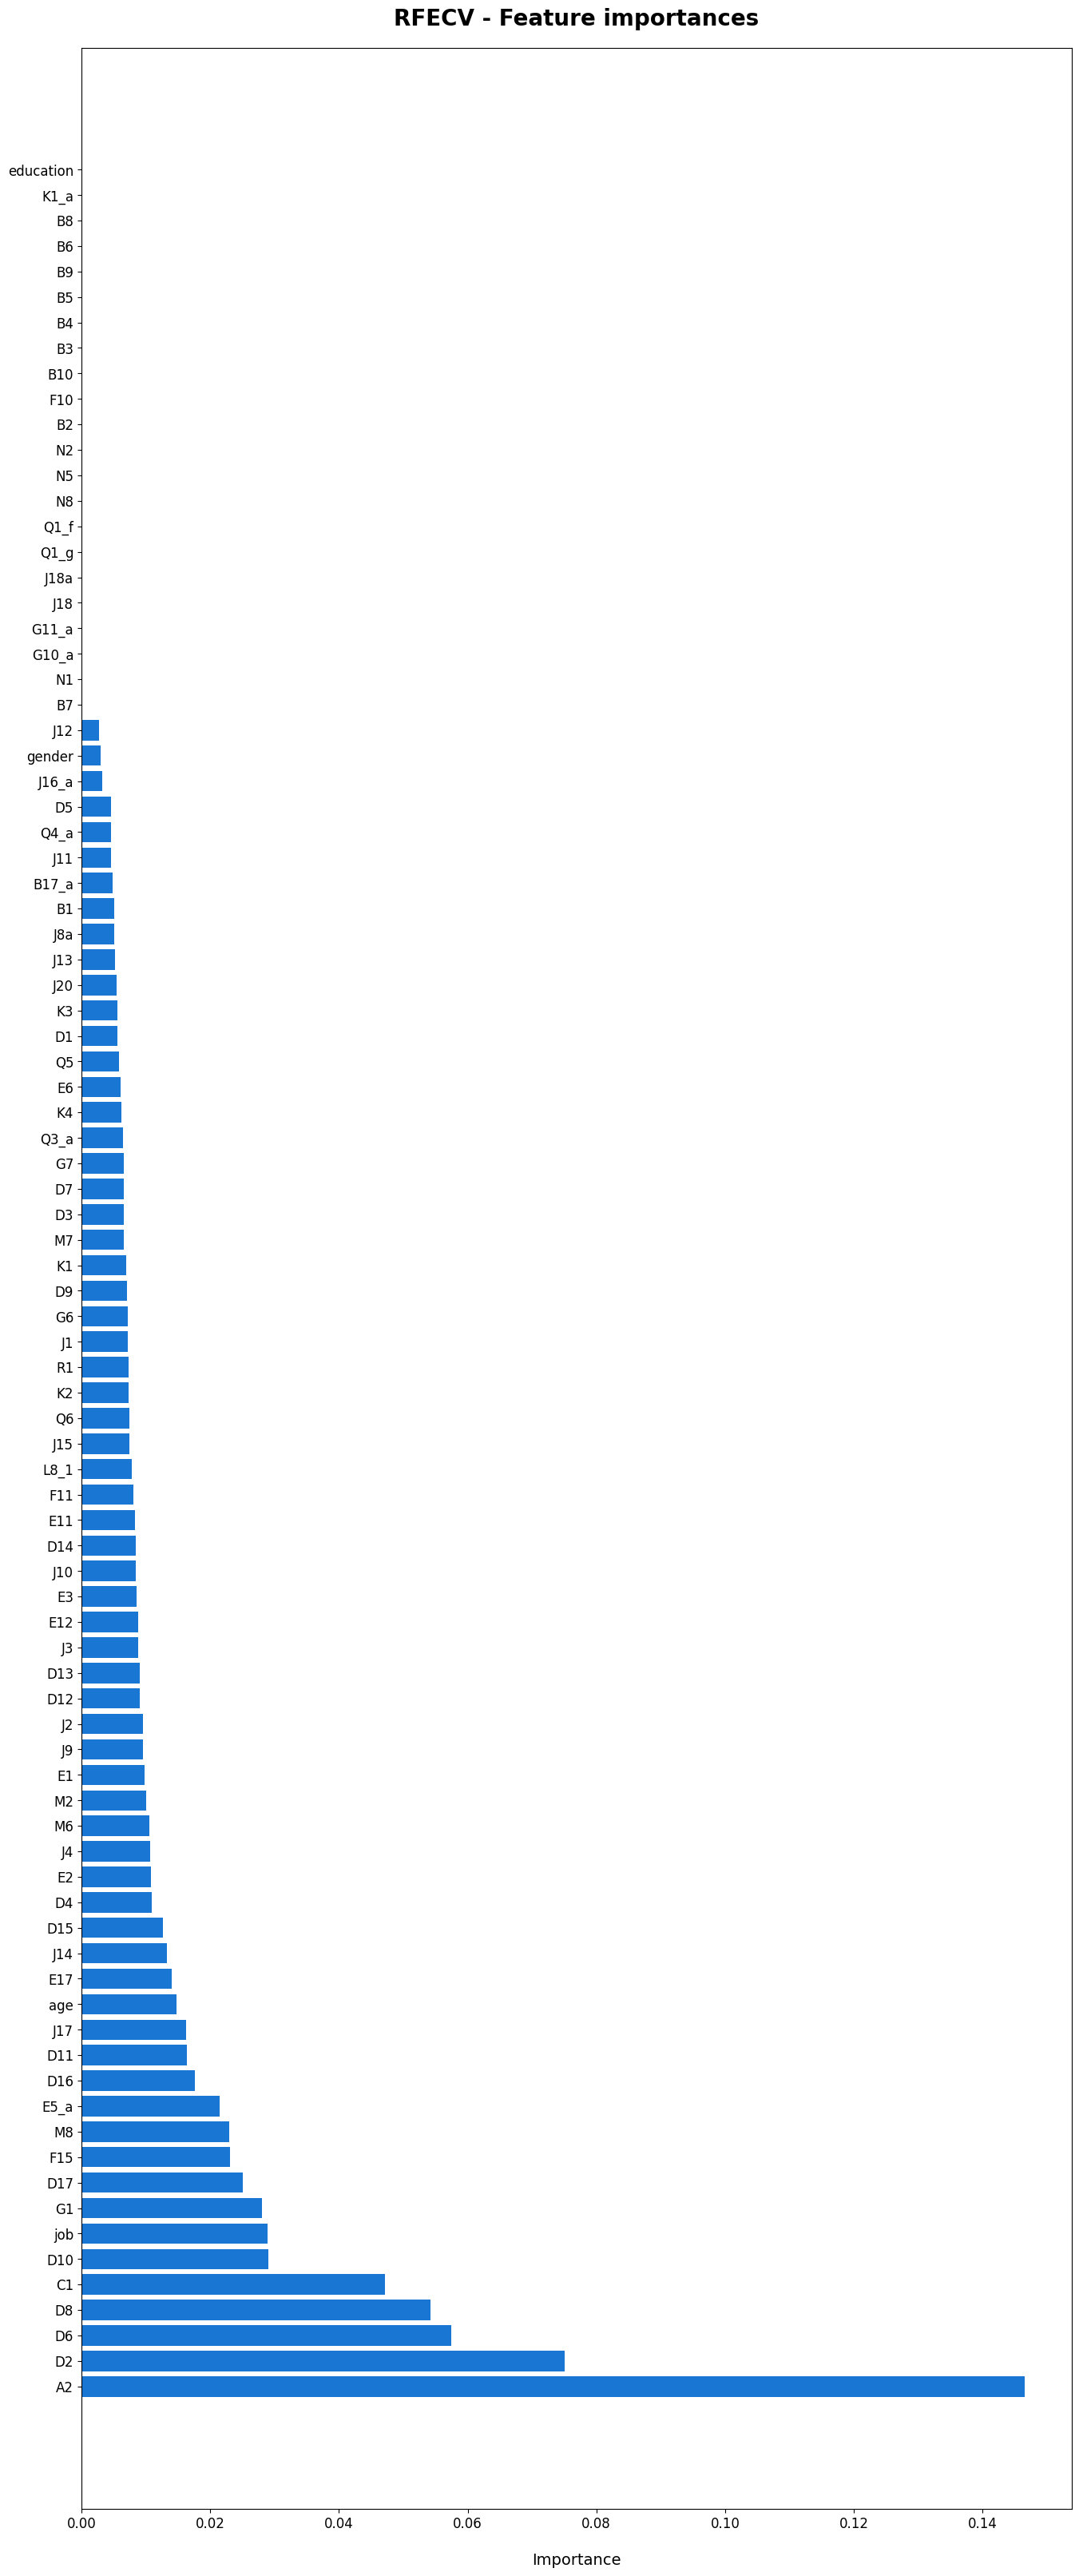

<Figure size 640x480 with 0 Axes>

In [ ]:
dset = pd.DataFrame()
dset['attr'] = selected_features.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 40))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()
# Save the figure as an image file
plt.savefig("RFECV_Feature_imp.png")

In [ ]:
dset.tail(74)

attr  importance
65        J17    0.016205
1         age    0.014732
39        E17    0.014020
62        J14    0.013289
29        D15    0.012627
..        ...         ...
11         B9    0.000000
8          B6    0.000000
10         B8    0.000000
67       K1_a    0.000000
40  education    0.000000

[74 rows x 2 columns]

In [ ]:
"""import scikitplot as skplt
rf = RandomForestClassifier()
rf.fit(X, y)
skplt.estimators.plot_feature_importances(
         rf, feature_names=['petal length', 'petal width',
                        'sepal length', 'sepal width'])
matplotlib.axes._subplots.AxesSubplot
plt.show() """

"import scikitplot as skplt\nrf = RandomForestClassifier()\nrf.fit(X, y)\nskplt.estimators.plot_feature_importances(\n         rf, feature_names=['petal length', 'petal width',\n                        'sepal length', 'sepal width'])\nmatplotlib.axes._subplots.AxesSubplot \nplt.show() "

In [ ]:
X_train.shape

(9870, 101)

In [ ]:
X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1 ,inplace = True)
#df.drop(df.columns[np.where(rfecv.estimator_.feature_importances_ < 0.009454)[0]], axis=1 ,inplace = True)
X_train.drop(X_train.columns[np.where(rfecv.estimator_.feature_importances_ < 0.0094)[0]], axis=1 ,inplace = True)

In [ ]:
X_test.drop(X_test.columns[np.where(rfecv.support_ == False)[0]], axis=1 ,inplace = True)
#df.drop(df.columns[np.where(rfecv.estimator_.feature_importances_ < 0.009454)[0]], axis=1 ,inplace = True)
X_test.drop(X_test.columns[np.where(rfecv.estimator_.feature_importances_ < 0.0094)[0]], axis=1 ,inplace = True)

In [ ]:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1 ,inplace = True)
#df.drop(df.columns[np.where(rfecv.estimator_.feature_importances_ < 0.009454)[0]], axis=1 ,inplace = True)
X.drop(X.columns[np.where(rfecv.estimator_.feature_importances_ < 0.0094)[0]], axis=1 ,inplace = True)

In [ ]:
X_train.shape

(9870, 27)

In [ ]:
pd.set_option('display.max_columns', None)
X_train.describe()

age           A2           C1           D2           D4  \
count  9870.000000  9870.000000  9870.000000  9870.000000  9870.000000   
mean     43.122198     1.674799     0.354875     1.063900     2.925787   
std      12.955580     0.652794     0.445441     0.674928     0.621029   
min      16.000000     1.000000     0.000000     0.000000     2.000000   
25%      34.000000     1.000000     0.000000     1.000000     2.493529   
50%      45.000000     1.872807     0.000000     1.000000     3.000000   
75%      53.300062     2.000000     1.000000     1.660704     3.000000   
max      64.000000     3.000000     1.000000     2.000000     4.000000   

                D6           D8          D10          D11          D15  \
count  9870.000000  9870.000000  9870.000000  9870.000000  9870.000000   
mean      1.869828     1.908734     2.656664     2.977737     2.979800   
std       0.759643     0.801720     0.876938     0.856706     0.616095   
min       0.000000     0.000000     1.000000     1.000000     2.000000   
25%       1.000000     1.000000     2.000000     2.646888     2.675749   
50%       2.000000     2.000000     3.000000     3.000000     3.000000   
75%       2.275271     2.492755     3.000000     3.856585     3.000000   
max       3.000000     3.000000     4.000000     4.000000     4.000000   

               D16          D17           E1           E2         E5_a  \
count  9870.000000  9870.000000  9870.000000  9870.000000  9870.000000   
mean      1.463779     1.596383   173.895580    78.076118     0.438848   
std       0.796653     0.805512     8.821261    16.673616     0.461480   
min       0.000000     0.000000   140.000000     0.000000     0.000000   
25%       1.000000     1.000000   167.564022    66.000000     0.000000   
50%       1.074477     1.589209   173.302014    76.000000     0.189747   
75%       2.000000     2.000000   180.000000    88.000000     1.000000   
max       3.000000     3.000000   205.000000   178.000000     1.000000   

               E17          job          F15           G1           J2  \
count  9870.000000  9870.000000  9870.000000  9870.000000  9870.000000   
mean      1.171601     0.368894     7.715491     0.709101     2.685024   
std       0.950276     0.440878     1.194170     0.419612     1.274298   
min      -1.000000    -0.199456     4.000000     0.000000     0.000000   
25%       0.921817     0.000000     7.000000     0.276009     1.804437   
50%       1.000000     0.000000     8.000000     1.000000     2.737692   
75%       1.191021     1.000000     8.948112     1.000000     4.000000   
max       4.000000     1.231171     9.000000     1.000000     5.000000   

                J4           J9          J14          J17           M2  \
count  9870.000000  9870.000000  9870.000000  9870.000000  9870.000000   
mean      2.788409     1.156480     3.523399     1.733769     0.958580   
std       1.523796     0.576920     1.955033     2.104556     1.685379   
min       0.000000     0.000000     0.000000     0.000000    -0.259896   
25%       1.415629     1.000000     1.972866     0.298352     0.000000   
50%       3.000000     1.000000     4.000000     1.000000     0.000000   
75%       4.000000     1.419366     5.000000     2.000000     1.171604   
max       6.000000     3.000000     6.000000    40.000000     6.000000   

                 M6           M8  
count   9870.000000  9870.000000  
mean    1679.652209     2.493198  
std     2596.945343     0.786404  
min        0.000000     1.000000  
25%      200.000000     2.000000  
50%      542.103601     2.644232  
75%     2000.000000     3.000000  
max    18500.000000     4.000000

##Learning Curve
shows the effect of adding more samples during the training process. It is depicted by checking the statistical performance of the model in terms of training score and testing score.

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


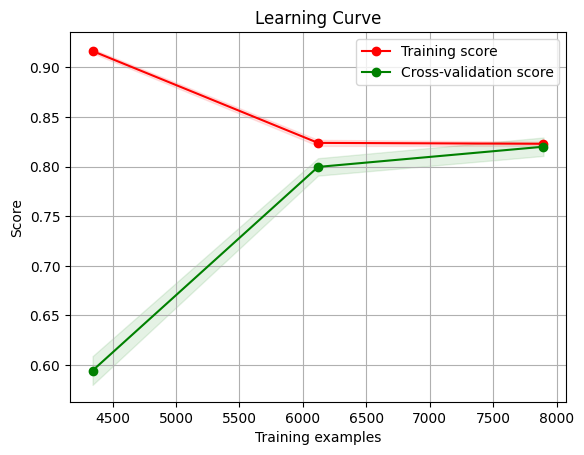

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import scikitplot as skplt

# load digits dataset
#X, y = load_digits(return_X_y=True)
# Assuming the target variable is stored in a column named 'target'

# define classifier

clf = LogisticRegression(solver = 'liblinear', penalty = 'l2')

# generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# plot the learning curve
skplt.estimators.plot_learning_curve(clf, X_train, y_train, cv=5, n_jobs=-1)

plt.show()
plt.savefig("learning curve_lr.png")

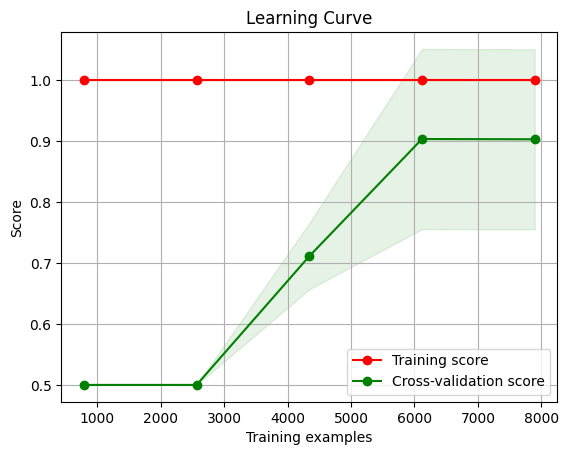

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import scikitplot as skplt
import xgboost

# load digits dataset
#X, y = load_digits(return_X_y=True)
# Assuming the target variable is stored in a column named 'target'

# define classifier

clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
               monotone_constraints='()', n_estimators=600,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=21,
              reg_alpha=0, reg_lambda=1)

# generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# plot the learning curve
skplt.estimators.plot_learning_curve(clf, X_train, y_train, cv=5, n_jobs=-1)

plt.show()
plt.savefig("learning curve_xgb.png")

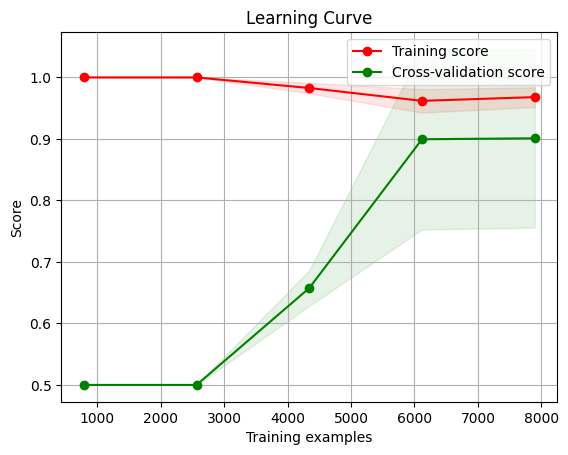

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import scikitplot as skplt
import lightgbm as lgb

# load digits dataset
#X, y = load_digits(return_X_y=True)
# Assuming the target variable is stored in a column named 'target'

# define classifier
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

clf = lgb.LGBMClassifier(**params)

# generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# plot the learning curve
skplt.estimators.plot_learning_curve(clf, X_train, y_train, cv=5, n_jobs=-1)

plt.show()
plt.savefig("learning curve_LGB.png")

## FOREST PLOT

In [ ]:
import statsmodels.api as sm

# build the model and fit the data
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.409767
         Iterations 7


In [ ]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                     A1   No. Observations:                 9870
Model:                          Logit   Df Residuals:                     9843
Method:                           MLE   Df Model:                           26
Date:                Sat, 03 Jun 2023   Pseudo R-squ.:                  0.4088
Time:                        06:48:53   Log-Likelihood:                -4044.4
converged:                       True   LL-Null:                       -6841.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0023      0.003     -0.917      0.359      -0.007       0.003
A2            -1.1481      0.055    -21.021      0.000      -1.255      -1.041
C1             0.5283      0.072      7.335      0.0

In [ ]:
import numpy as np
params = model.params
conf = model.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
# convert log odds to ORs
odds = pd.DataFrame(np.exp(conf))
# check if pvalues are significant
odds['pvalues'] = model.pvalues
odds['significant?'] = ['significant' if pval <= 0.05 else 'not significant' for pval in model.pvalues]
odds

2.5%     97.5%  Odds Ratio       pvalues     significant?
age   0.992679  1.002666    0.997660  3.589100e-01  not significant
A2    0.285028  0.353077    0.317233  4.219189e-98      significant
C1    1.472727  1.953115    1.695997  2.214742e-13      significant
D2    2.319216  2.829037    2.561474  7.428895e-77      significant
D4    1.015248  1.246321    1.124867  2.449669e-02      significant
D6    1.415046  1.701253    1.551564  8.955023e-21      significant
D8    1.515095  1.801177    1.651955  5.497195e-30      significant
D10   0.742590  0.856425    0.797479  4.978217e-10      significant
D11   0.915190  1.056763    0.983432  6.488874e-01  not significant
D15   0.716324  0.871924    0.790303  2.691911e-06      significant
D16   0.690641  0.816482    0.750930  1.971554e-11      significant
D17   1.162640  1.365665    1.260070  1.800803e-08      significant
E1    1.007675  1.016645    1.012150  9.204059e-08      significant
E2    1.000269  1.008002    1.004128  3.599475e-02      significant
E5_a  1.237386  1.583117    1.399617  8.862116e-08      significant
E17   0.872080  0.980606    0.924752  8.936407e-03      significant
job   0.924813  1.248392    1.074490  3.478777e-01  not significant
F15   0.970940  1.066608    1.017651  4.654943e-01  not significant
G1    0.284098  0.378765    0.328034  3.965000e-52      significant
J2    0.840832  0.917701    0.878426  6.307065e-09      significant
J4    0.877392  0.947508    0.911776  2.486672e-06      significant
J9    0.708585  0.866877    0.783745  2.165335e-06      significant
J14   0.916986  0.975556    0.945818  4.206841e-04      significant
J17   0.841648  0.897473    0.869113  1.104199e-17      significant
M2    1.041384  1.121125    1.080519  3.882433e-05      significant
M6    1.000038  1.000087    1.000062  4.822061e-07      significant
M8    0.692921  0.806863    0.747725  7.120911e-14      significant

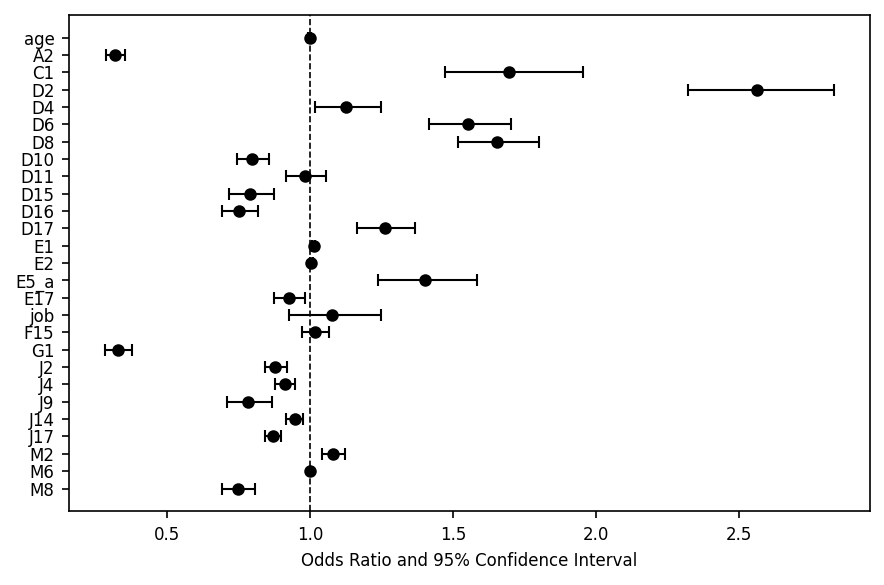

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4), dpi=150)
ci = [odds.iloc[::-1]['Odds Ratio'] - odds.iloc[::-1]['2.5%'].values, odds.iloc[::-1]['97.5%'].values - odds.iloc[::-1]['Odds Ratio']]
plt.errorbar(x=odds.iloc[::-1]['Odds Ratio'], y=odds.iloc[::-1].index.values, xerr=ci,
            color='black',  capsize=3, linestyle='None', linewidth=1,
            marker="o", markersize=5, mfc="black", mec="black")
plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=8)
plt.tight_layout()
plt.savefig('forest_plot.png', dpi=300)
plt.show()

## MODEL TRAIN + VALIDATION

###SVC

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

model = SVC(class_weight={0: 1, 1: 1.4})
m = model.fit(X_train, y_train)
y_pred_svc = m.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_svc))

ACCURACY OF THE MODEL:  0.47010309278350515


In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
cm_SVC = metrics.confusion_matrix(y_test, y_pred_svc)
print(cm_SVC)
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_svc, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_svc))

Confusion Matrix for the Test Case
[[1461 1731]
 [  68  135]]

Classification Report
              precision    recall  f1-score   support

           0      0.956     0.458     0.619      3192
           1      0.072     0.665     0.130       203

    accuracy                          0.470      3395
   macro avg      0.514     0.561     0.375      3395
weighted avg      0.903     0.470     0.590      3395

0.5613656987295825


###LGB

In [ ]:
import lightgbm as lgb

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

lgb = lgb.LGBMClassifier(**params)
y_pred = lgb.fit(X_train, y_train).predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
ACCURACY OF THE MODEL:  0.9328424153166421


In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
cm_LGB = metrics.confusion_matrix(y_test, y_pred)
print(cm_LGB)
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

Confusion Matrix for the Test Case
[[3068  124]
 [ 104   99]]

Classification Report
              precision    recall  f1-score   support

           0      0.967     0.961     0.964      3192
           1      0.444     0.488     0.465       203

    accuracy                          0.933      3395
   macro avg      0.706     0.724     0.714      3395
weighted avg      0.936     0.933     0.934      3395

0.7244188056347766


### NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))



ACCURACY OF THE MODEL:  0.7628865979381443


In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
cm_NB = metrics.confusion_matrix(y_test, y_pred)
print(cm_NB)
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

Confusion Matrix for the Test Case
[[2428  764]
 [  41  162]]

Classification Report
              precision    recall  f1-score   support

           0      0.983     0.761     0.858      3192
           1      0.175     0.798     0.287       203

    accuracy                          0.763      3395
   macro avg      0.579     0.779     0.572      3395
weighted avg      0.935     0.763     0.824      3395

0.7793405928614641


### DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=21)
clf = decision_tree.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8503681885125184


In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
cm_DT = metrics.confusion_matrix(y_test, y_pred)
print(cm_DT)
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

Confusion Matrix for the Test Case
[[2792  400]
 [ 108   95]]

Classification Report
              precision    recall  f1-score   support

           0      0.963     0.875     0.917      3192
           1      0.192     0.468     0.272       203

    accuracy                          0.850      3395
   macro avg      0.577     0.671     0.594      3395
weighted avg      0.917     0.850     0.878      3395

0.6713335061792411


###Random Forest with oob evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param = {'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 780,
 'criterion': 'gini'}

# creating a RF classifier
clf = RandomForestClassifier(oob_score=True)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_rf = clf.predict(X_test)
# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_rf))


ACCURACY OF THE MODEL:  0.9310751104565538


In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
cm_RF = metrics.confusion_matrix(y_test, y_pred_rf)
print(cm_RF)
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_rf, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_rf))

Confusion Matrix for the Test Case
[[3068  124]
 [ 110   93]]

Classification Report
              precision    recall  f1-score   support

           0      0.965     0.961     0.963      3192
           1      0.429     0.458     0.443       203

    accuracy                          0.931      3395
   macro avg      0.697     0.710     0.703      3395
weighted avg      0.933     0.931     0.932      3395

0.7096404805116239


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
skfold = StratifiedKFold(n_splits=20)
clf = DecisionTreeClassifier()
results = cross_val_score(clf, X_train, y_train, cv = skfold, scoring = 'f1_macro')
print(results)
print()
print ("F1_Macro = ", np.mean(results), "+/-", np.std(results))

results = cross_val_score(clf, X_train, y_train, cv = skfold, scoring = 'accuracy')
print("\n" , results)
print()
print ("Accuracy = ", np.mean(results), "+/-", np.std(results))

[0.68099728 0.66578194 0.64823166 0.89068109 0.93699887 0.92472334
 0.93305326 0.93506942 0.92286325 0.94116802 0.94512399 0.94101241
 0.93699421 0.94305844 0.92059847 0.94313725 0.93492393 0.93699421
 0.94516016 0.943034  ]

F1_Macro =  0.893480260756974 +/- 0.09686843965814448

 [0.69635628 0.65991903 0.67611336 0.89878543 0.951417   0.92307692
 0.93522267 0.94331984 0.91902834 0.93927126 0.94117647 0.95334686
 0.93103448 0.93914807 0.9188641  0.94117647 0.92292089 0.92900609
 0.94320487 0.93914807]

Accuracy =  0.8950768245312923 +/- 0.09241314946612035


### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param = {'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 780,
 'criterion': 'gini'}

# creating a RF classifier
clf = RandomForestClassifier(class_weight={0: 10, 1: .1})

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)
# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.891899852724595


In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

Confusion Matrix for the Test Case
[[2892  300]
 [  67  136]]

Classification Report
              precision    recall  f1-score   support

           0      0.977     0.906     0.940      3192
           1      0.312     0.670     0.426       203

    accuracy                          0.892      3395
   macro avg      0.645     0.788     0.683      3395
weighted avg      0.938     0.892     0.910      3395

0.7879828882551205


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
skfold = StratifiedKFold(n_splits=20)
clf = DecisionTreeClassifier()
results = cross_val_score(clf, X_train, y_train, cv = skfold, scoring = 'f1_macro')
print(results)
print()
print ("F1_Macro = ", np.mean(results), "+/-", np.std(results))

results = cross_val_score(clf, X_train, y_train, cv = skfold, scoring = 'accuracy')
print("\n" , results)
print()
print ("Accuracy = ", np.mean(results), "+/-", np.std(results))

[0.68536657 0.64235412 0.65379836 0.90688259 0.93910256 0.93289895
 0.94122594 0.93711064 0.91880342 0.93711064 0.9471658  0.93691619
 0.9410795  0.94101241 0.92681841 0.93499473 0.93494969 0.93088405
 0.94310163 0.94714663]

F1_Macro =  0.8939361406964629 +/- 0.09872985730571436

 [0.69838057 0.67408907 0.68218623 0.89878543 0.93724696 0.93522267
 0.92510121 0.93724696 0.91700405 0.93927126 0.93914807 0.94523327
 0.92900609 0.93103448 0.92292089 0.93711968 0.92292089 0.93306288
 0.94726166 0.93711968]

Accuracy =  0.8944680999581183 +/- 0.0887444570915804


### GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=500, learning_rate=1,
                                 max_depth=1, random_state=21).fit(X_train, y_train)

y_pred = clf.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9139911634756995


In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
cm_GB = metrics.confusion_matrix(y_test, y_pred)
print(cm_GB)
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

Confusion Matrix for the Test Case
[[2993  199]
 [  93  110]]

Classification Report
              precision    recall  f1-score   support

           0      0.970     0.938     0.953      3192
           1      0.356     0.542     0.430       203

    accuracy                          0.914      3395
   macro avg      0.663     0.740     0.692      3395
weighted avg      0.933     0.914     0.922      3395

0.7397642813931381


### ADA BOOST

In [ ]:

#clf = RandomForestClassifier(n_estimators = 600, max_features = 'log2', max_depth= 780,random_state=20, criterion = 'gini')
clf = DecisionTreeClassifier(max_depth=1)

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=clf, n_estimators=600, random_state=21, learning_rate=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.901620029455081


In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
cm_AB = metrics.confusion_matrix(y_test, y_pred)
print(cm_AB)
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

Confusion Matrix for the Test Case
[[2956  236]
 [  98  105]]

Classification Report
              precision    recall  f1-score   support

           0      0.968     0.926     0.947      3192
           1      0.308     0.517     0.386       203

    accuracy                          0.902      3395
   macro avg      0.638     0.722     0.666      3395
weighted avg      0.928     0.902     0.913      3395

0.7216532711088064


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'liblinear', penalty = 'l2')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.7661266568483064


In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
cm_LR = metrics.confusion_matrix(y_test, y_pred)
print(cm_LR)
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

Confusion Matrix for the Test Case
[[2429  763]
 [  31  172]]

Classification Report
              precision    recall  f1-score   support

           0      0.987     0.761     0.860      3192
           1      0.184     0.847     0.302       203

    accuracy                          0.766      3395
   macro avg      0.586     0.804     0.581      3395
weighted avg      0.939     0.766     0.826      3395

0.8041277763373952


### XG BOOST

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "booster" : ['gbtree', 'gblinear' ,'dart']

}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
classifier=xgboost.XGBClassifier()

random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 30.64 seconds.


In [ ]:

random_search.best_estimator_

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
               monotone_constraints='()', n_estimators=600,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=21,
              reg_alpha=0, reg_lambda=1)

In [ ]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9328424153166421


In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
cm_XGB = metrics.confusion_matrix(y_test, y_pred)
print(cm_XGB)
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

Confusion Matrix for the Test Case
[[3069  123]
 [ 105   98]]

Classification Report
              precision    recall  f1-score   support

           0      0.967     0.961     0.964      3192
           1      0.443     0.483     0.462       203

    accuracy                          0.933      3395
   macro avg      0.705     0.722     0.713      3395
weighted avg      0.936     0.933     0.934      3395

0.7221123930515946


###SVC standard scalar

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8986745213549338


In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

Confusion Matrix for the Test Case
[[3013  179]
 [ 165   38]]

Classification Report
              precision    recall  f1-score   support

           0      0.948     0.944     0.946      3192
           1      0.175     0.187     0.181       203

    accuracy                          0.899      3395
   macro avg      0.562     0.566     0.563      3395
weighted avg      0.902     0.899     0.900      3395

0.565557211995506


###Kneighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.6718703976435935


In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

Confusion Matrix for the Test Case
[[2169 1023]
 [  91  112]]

Classification Report
              precision    recall  f1-score   support

           0      0.960     0.680     0.796      3192
           1      0.099     0.552     0.167       203

    accuracy                          0.672      3395
   macro avg      0.529     0.616     0.482      3395
weighted avg      0.908     0.672     0.758      3395

0.6156177080632615


###Bagging Classifier


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
clf = BaggingClassifier(base_estimator=SVC(),
                         n_estimators=10, random_state=21, n_jobs = -1).fit(X_train, y_train)
clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.6718703976435935


In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

Confusion Matrix for the Test Case
[[2169 1023]
 [  91  112]]

Classification Report
              precision    recall  f1-score   support

           0      0.960     0.680     0.796      3192
           1      0.099     0.552     0.167       203

    accuracy                          0.672      3395
   macro avg      0.529     0.616     0.482      3395
weighted avg      0.908     0.672     0.758      3395

0.6156177080632615


## TRAINSET PERFORMANCE

In [ ]:
y_train_pred = clf.predict(X_train)

In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_train, y_train_pred))
print()

print("Classification Report")
print(metrics.classification_report(y_train, y_train_pred, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, y_train_pred))

Confusion Matrix for the Test Case
[[3855 1080]
 [2785 2150]]

Classification Report
              precision    recall  f1-score   support

           0      0.581     0.781     0.666      4935
           1      0.666     0.436     0.527      4935

    accuracy                          0.608      9870
   macro avg      0.623     0.608     0.596      9870
weighted avg      0.623     0.608     0.596      9870

0.6084093211752786


## CUSTOM ENSEMBLE

#### TESTSET PERFORMANCE

In [ ]:
## Ensemble of Models
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

estimator = []
#estimator.append(('GNB', GaussianNB()))
estimator.append(('RF', RandomForestClassifier(class_weight={0: 5, 1: .1}, n_estimators = 400, random_state=21) ))
#estimator.append(('RF', RandomForestClassifier(oob_score=True)  ))
estimator.append(('gb', GradientBoostingClassifier()))
estimator.append(('lgb', lgb))

#estimator.append(('dt', DecisionTreeClassifier(random_state=0, max_depth=2)) )
#estimator.append(('cnb', ComplementNB()) )
#estimator.append(('xgb', xgboost.XGBClassifier()) )
#estimator.append(('AB', AdaBoostClassifier()) )
#estimator.append(('lr', LogisticRegression(solver = 'liblinear')) )

hard_voting = VotingClassifier(estimators = estimator, voting ='soft', n_jobs = -1)
x = hard_voting.fit(X_train, y_train)
y_pred_ensemble = hard_voting.predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_ensemble))


ACCURACY OF THE MODEL:  0.9304860088365243


In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
cm_ensemble = metrics.confusion_matrix(y_test, y_pred_ensemble)
print(cm_ensemble)
print()

print("Classification Report")
print(metrics.classification_report(y_test, y_pred_ensemble, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_ensemble))

Confusion Matrix for the Test Case
[[3039  153]
 [  83  120]]

Classification Report
              precision    recall  f1-score   support

           0      0.973     0.952     0.963      3192
           1      0.440     0.591     0.504       203

    accuracy                          0.930      3395
   macro avg      0.706     0.772     0.733      3395
weighted avg      0.941     0.930     0.935      3395

0.7716003370495205


## Stack Bar Plot for Error Analysis

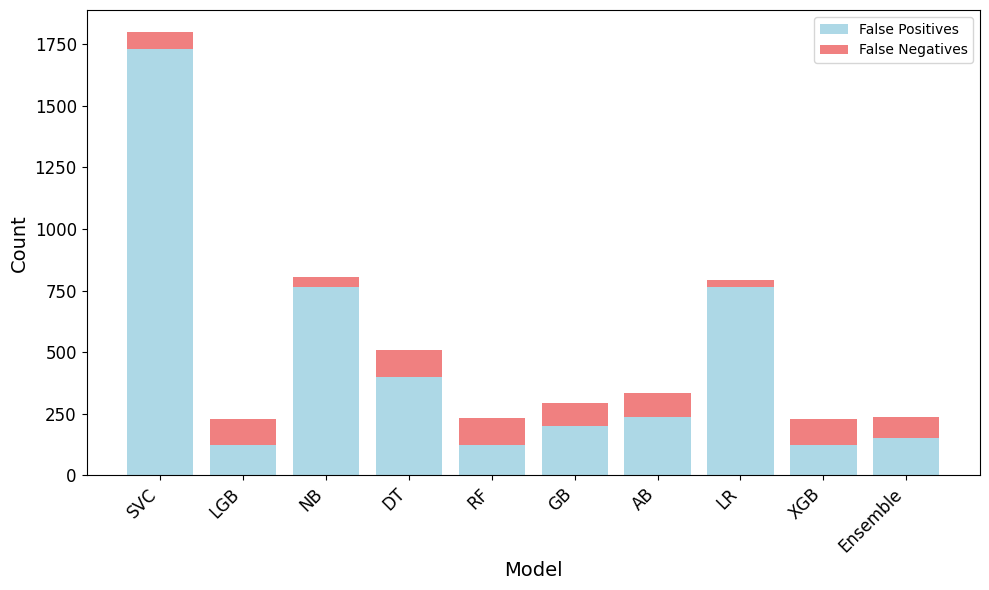

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the confusion matrices
confusion_matrices = [
    cm_SVC,
    cm_LGB,
    cm_NB,
    cm_DT,
    cm_RF,
    cm_GB,
    cm_AB,
    cm_LR,
    cm_LGB,
    cm_ensemble
]

# Create a list of the model names
model_names = [
    "SVC",
    "LGB",
    "NB",
    "DT",
    "RF",
    "GB",
    "AB",
    "LR",
    "XGB",
    "Ensemble",
]

# Assuming you have stored the confusion matrices in variables cm1, cm2, ..., cm12

# Extract false positives and false negatives from each confusion matrix
fp = [cm[0][1] for i, cm in enumerate(confusion_matrices)]
fn = [cm[1][0] for i, cm in enumerate(confusion_matrices)]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked bars for false positives and false negatives
ax.bar(model_names, fp, label='False Positives', color='lightblue')
ax.bar(model_names, fn, bottom=fp, label='False Negatives', color='lightcoral')

# Rotate x-axis tick labels for better visibility (optional)
plt.xticks(rotation=45, ha='right')

# Add labels, title, and legend
ax.set_xlabel('Model')
ax.set_ylabel('Count')
ax.legend()

# Adjust the layout and save the plot
plt.tight_layout()
plt.savefig('error_analysis.png', dpi=300)

# Show the plot (optional)
plt.show()

### Significance Testing

In [ ]:
from scipy.stats import wilcoxon

# Assuming you have predictions for two models: model1_predictions and model2_predictions

# Calculate the differences between the predicted values and the actual values
model1_diff = y_pred_svc - y_test
model2_diff = y_pred_rf - y_test
model3_diff = y_pred_ensemble - y_test

# Perform the Wilcoxon signed-rank test
statistic1, p_value1 = wilcoxon(model1_diff, model2_diff)

# Perform the Wilcoxon signed-rank test
statistic2, p_value2 = wilcoxon(model2_diff, model3_diff)

# Print the test statistic and p-value
print("Wilcoxon signed-rank test results:")
print(f"Test statistic: {statistic1}")
print(f"P-value: {p_value1}")

# Print the test statistic and p-value
print("Wilcoxon signed-rank test results:")
print(f"Test statistic: {statistic2}")
print(f"P-value: {p_value2}")

# Compare the p-value to the significance level
alpha = 0.00000005  # Chosen significance level
if p_value1 < alpha:
    print("There is a significant difference between the two models.")
else:
    print("There is no significant difference between the two models.")

if p_value2 < alpha:
    print("There is a significant difference between the two models.")
else:
    print("There is no significant difference between the two models.")


Wilcoxon signed-rank test results:
Test statistic: 46534.0
P-value: 0.0
Wilcoxon signed-rank test results:
Test statistic: 2029.5
P-value: 3.9781198501701153e-07
There is a significant difference between the two models.
There is no significant difference between the two models.


##Realiability diagram / Calibration Curve
is a graphical representation of the relationship between predicted probabilities and observed outcomes in a binary classification problem
- The calibration curve plots the mean predicted probability for each bin against the true fraction of positive class instances in that bin. The ideal calibration curve is a diagonal line, indicating perfect calibration where the predicted probabilities are well-calibrated and correspond closely to the actual probabilities.
-it helps to assess the reliability of the classifier's probability estimates and can be useful in applications where accurate probability estimation is important

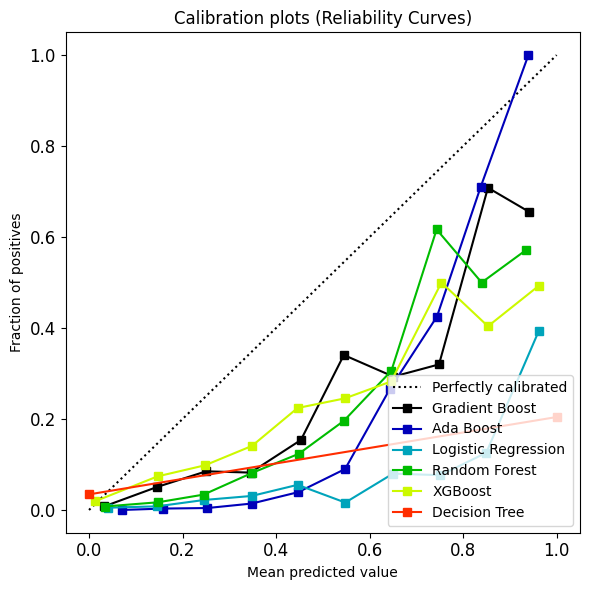

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt

# List of classifiers and their names
classifiers = [
    (GradientBoostingClassifier(), 'Gradient Boost'),
    (AdaBoostClassifier(), 'Ada Boost'),
    (LogisticRegression(), 'Logistic Regression'),
    (RandomForestClassifier(), 'Random Forest'),
    (xgboost.XGBClassifier(), 'XGBoost'),
    (DecisionTreeClassifier(), 'Decision Tree')
    #(VotingClassifier(estimators = estimator), 'Ensemble')
]

# Prepare empty lists for probabilities and classifier names
probas_list = []
clf_names = []

# Loop over classifiers and compute probabilities
for clf, clf_name in classifiers:
    clf.fit(X_train, y_train)
    proba = clf.predict_proba(X_test)
    probas_list.append(proba)
    clf_names.append(clf_name)

# Plot calibration curves for each classifier
skplt.metrics.plot_calibration_curve(y_test, probas_list, clf_names, n_bins=10, figsize=(6, 6))

plt.tight_layout()  # Adjust subplot spacing
plt.show()
plt.savefig("calibration_curve.png")

###Ensemble (calibration & learning curve)

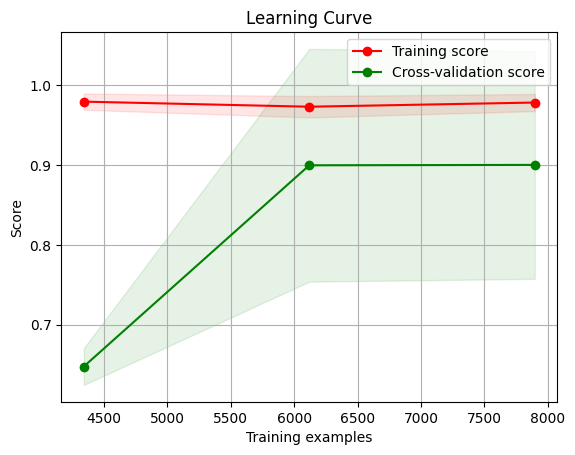

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import scikitplot as skplt

estimator = []
#estimator.append(('GNB', GaussianNB()))
estimator.append(('RF', RandomForestClassifier(class_weight={0: 5, 1: .1}, n_estimators = 400, random_state=20) ))
#estimator.append(('RF', RandomForestClassifier(oob_score=True)  ))
estimator.append(('gb', GradientBoostingClassifier()))
estimator.append(('lgb', lgb))

#estimator.append(('dt', DecisionTreeClassifier(random_state=0, max_depth=2)) )
#estimator.append(('cnb', ComplementNB()) )
#estimator.append(('xgb', xgboost.XGBClassifier()) )
#estimator.append(('AB', AdaBoostClassifier()) )
#estimator.append(('lr', LogisticRegression(solver = 'liblinear')) )

# define classifier
clf = VotingClassifier(estimators = estimator, voting='soft')

# generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# plot the learning curve
skplt.estimators.plot_learning_curve(clf, X_train, y_train, cv=5, n_jobs=-1)

plt.show()
plt.savefig("learning_curve_ensemble.png")

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


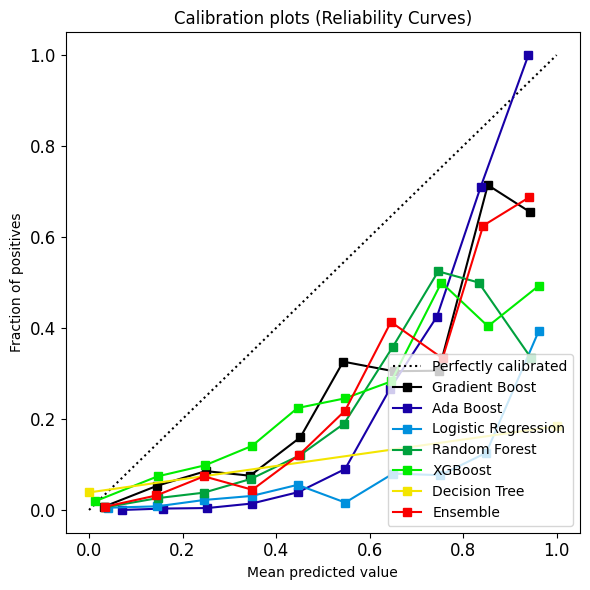

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt

# List of classifiers and their names
classifiers = [
    (GradientBoostingClassifier(), 'Gradient Boost'),
    (AdaBoostClassifier(), 'Ada Boost'),
    (LogisticRegression(), 'Logistic Regression'),
    (RandomForestClassifier(), 'Random Forest'),
    (xgboost.XGBClassifier(), 'XGBoost'),
    (DecisionTreeClassifier(), 'Decision Tree'),
    (VotingClassifier(estimators = estimator, voting='soft'), 'Ensemble')
]

# Prepare empty lists for probabilities and classifier names
probas_list = []
clf_names = []

# Loop over classifiers and compute probabilities
for clf, clf_name in classifiers:
    clf.fit(X_train, y_train)
    proba = clf.predict_proba(X_test)
    probas_list.append(proba)
    clf_names.append(clf_name)

# Plot calibration curves for each classifier
skplt.metrics.plot_calibration_curve(y_test, probas_list, clf_names, n_bins=10, figsize=(6, 6))

plt.tight_layout()  # Adjust subplot spacing
plt.show()
plt.savefig("calibration_curve_ensemble.png")

TRAINSET PERFORMANCE

In [ ]:
y_train_pred = hard_voting.predict(X_train)

In [ ]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_train, y_train_pred))
print()

print("Classification Report")
print(metrics.classification_report(y_train, y_train_pred, digits = 3))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, y_train_pred))

Confusion Matrix for the Test Case
[[4896   39]
 [ 201 4734]]

Classification Report
              precision    recall  f1-score   support

           0      0.961     0.992     0.976      4935
           1      0.992     0.959     0.975      4935

    accuracy                          0.976      9870
   macro avg      0.976     0.976     0.976      9870
weighted avg      0.976     0.976     0.976      9870

0.9756838905775076


# EX AI

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lime

#we're importing lime_tabular to work with tabular data. Lime also supports other data like images etc.
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Content', 'Discontent'],
    mode='classification'
)

In [ ]:
y_test.head(50)

10860    0
8359     0
3158     0
16309    0
6103     0
6066     0
4635     0
5530     0
12956    0
8431     0
306      0
6981     0
3274     0
17510    0
4879     0
14374    0
9459     0
16384    0
2227     0
14908    0
10453    0
6454     0
3035     0
17917    0
17852    0
12861    1
16471    0
11771    0
3071     0
5351     0
2076     0
2269     0
17780    0
4907     0
2615     0
1759     0
1392     0
10797    0
10614    0
1444     0
10020    0
16709    0
10235    0
18109    0
14041    0
10715    0
9131     0
11831    0
9944     0
4368     0
Name: A1, dtype: int64

### Case -1

In [ ]:
X_test.iloc[25], y_test.iloc[25]

(age       38.0
 A2         1.0
 C1         1.0
 D2         1.0
 D4         4.0
 D6         2.0
 D8         0.0
 D10        4.0
 D11        4.0
 D15        4.0
 D16        1.0
 D17        1.0
 E1       187.0
 E2       100.0
 E5_a       1.0
 E17        1.0
 job        0.0
 F15        5.0
 G1         1.0
 J2         2.0
 J4         5.0
 J9         1.0
 J14        5.0
 J17        2.0
 M2         0.0
 M6      3000.0
 M8         3.0
 Name: 25, dtype: float64,
 1)

In [ ]:
#why does this instance in 2nd row belong to Discontent class?

exp = explainer.explain_instance(
    data_row=X_test.iloc[25],
    predict_fn=hard_voting.predict_proba, num_features = 20
)

exp.show_in_notebook(show_table=True)

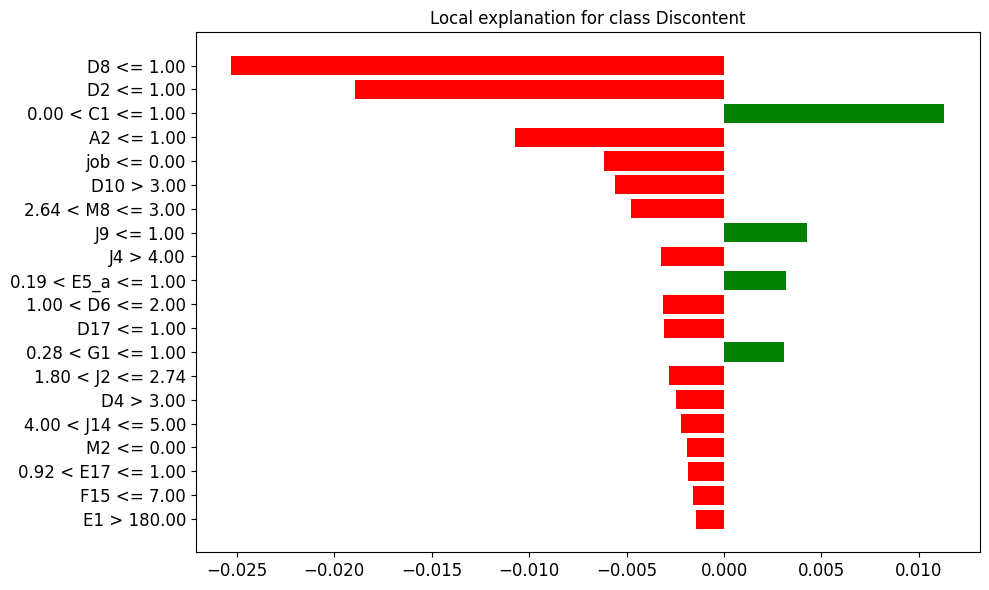

In [ ]:
plt = exp.as_pyplot_figure()
plt.set_figwidth(10)
plt.set_figheight(6)
plt.tight_layout()
plt.savefig("case-1.png")
#save_fig("case-1.png")

### Case-2

In [ ]:
X_test.iloc[-50], y_test.iloc[-50]

(age      59.000000
 A2        1.000000
 C1        1.000000
 D2        2.000000
 D4        1.000000
 D6        3.000000
 D8        4.000000
 D10       1.000000
 D11       3.000000
 D12       4.000000
 D13       3.000000
 D14       3.000000
 D15       3.000000
 D16       2.000000
 D17       3.000000
 E1      180.000000
 E2      100.000000
 E5_a      1.000000
 E17       7.000000
 job       1.000000
 F11       0.140824
 F15       0.000000
 G1        0.000000
 J3        4.000000
 J4        1.000000
 J14       4.000000
 J17       0.000000
 M6      850.000000
 M8        2.000000
 Name: 3345, dtype: float64,
 1)

In [ ]:
#why does this instance in 10th row belong to Content class?

exp = explainer.explain_instance(
    data_row=X_test.iloc[-50],
    predict_fn=hard_voting.predict_proba, num_features = 29
)

exp.show_in_notebook(show_table=True)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


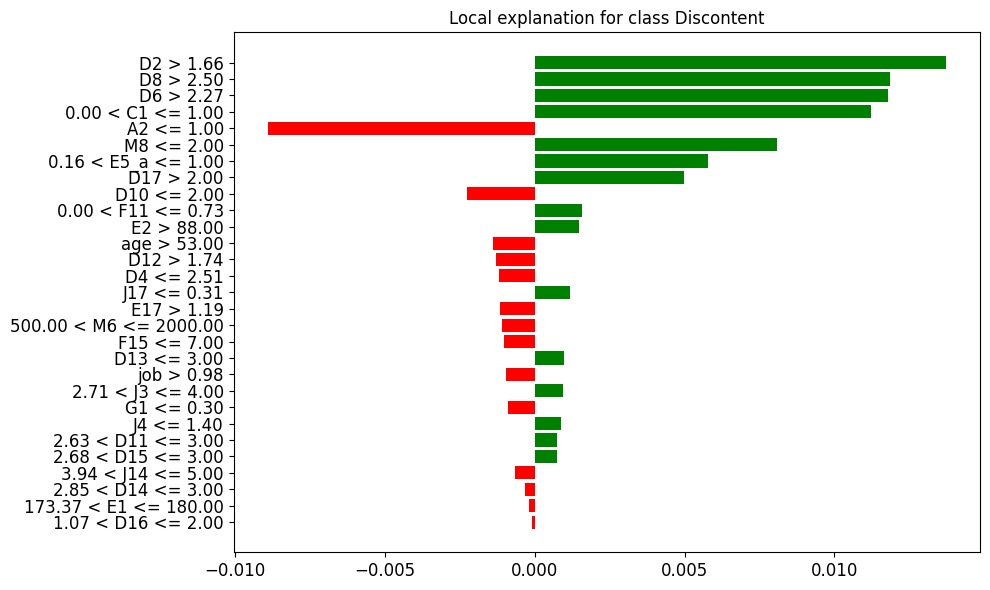

In [ ]:
plt = exp.as_pyplot_figure()
plt.set_figwidth(10)
plt.set_figheight(6)
plt.tight_layout()
plt.savefig("case-2.png")